 # Analyzing ephys and transcriptomic data for the Psilocybin Project. 
 ### Just for fun, ignore everything here.
 #### Lindsay Ng data.

In [61]:
#imports

import pandas as pd    
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import umap
import numpy as np

In [2]:
#csv containing all calulated ephys features from human and mouse experiments
data = pd.read_csv("Psilocybin_ephys_features_washin.csv")

In [3]:
#calculating AP_threshold feature
data["AP_thres"] = data["AP_peak"] - data["AP_amp"]
data

,name,species,treatment,after_treatment,common_potential,cell_type,notes,AP_peak,AP_amp,max_dvdt,...,FI_600,FI_650,FI_700,FI_750,FI_800,FI_850,FI_900,Layer,topLeaf_label,AP_thres
0,Slc17a6-IRES-Cre;Ai14-564186.11.09.01,mouse,stability,0.0,NaN,pyramidal,NaN,41.198730,77.118279,294.18945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.919549
1,Slc17a6-IRES-Cre;Ai14-564186.11.09.01,mouse,stability,1.0,NaN,pyramidal,NaN,26.489258,64.440643,204.46777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.951385
2,Slc17a6-IRES-Cre;Ai14-564186.07.09.01,mouse,stability,0.0,NaN,pyramidal,NaN,46.783447,85.059761,388.79395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.276314
3,Slc17a6-IRES-Cre;Ai14-564186.07.09.01,mouse,stability,1.0,NaN,pyramidal,NaN,39.947510,86.917267,400.08545,...,33.0,34.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,-46.969757
4,Slc17a6-IRES-Cre;Ai14-563068.10.10.01,mouse,stability,0.0,NaN,pyramidal,NaN,50.048828,100.650460,390.01465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.601632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Stability Experiments

In [4]:
#filter out stability experiments from full dataframe
stability = data[(data['treatment'] == "stability") | (data['treatment'] == "control")]
stability.columns

Index(['name', 'species', 'treatment', 'after_treatment', 'common_potential',
       'cell_type', 'notes', 'AP_peak', 'AP_amp', 'max_dvdt', 'min_dvdt',
       'halfwidth', 'resonance_freq', 'cutoff', 'input_R', 'sag', 'RMP',
       'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp', 'washin_change', 'washin_outcome',
       'FI_50', 'FI_100', 'FI_150', 'FI_200', 'FI_250', 'FI_300', 'FI_350',
       'FI_400', 'FI_450', 'FI_500', 'FI_550', 'FI_600', 'FI_650', 'FI_700',
       'FI_750', 'FI_800', 'FI_850', 'FI_900', 'Layer', 'topLeaf_label',
       'AP_thres'],
      dtype='object')

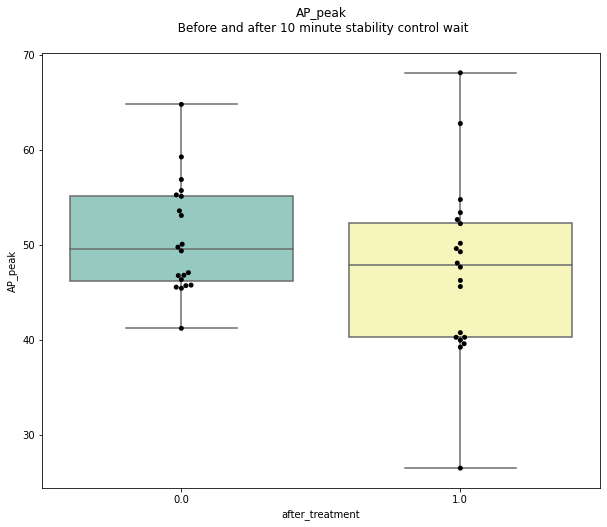

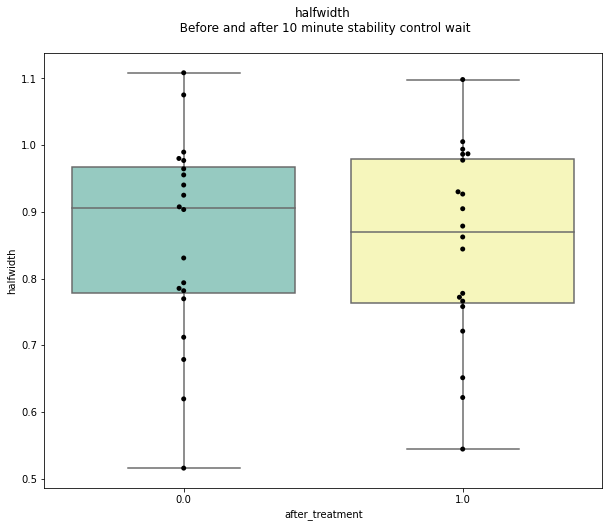

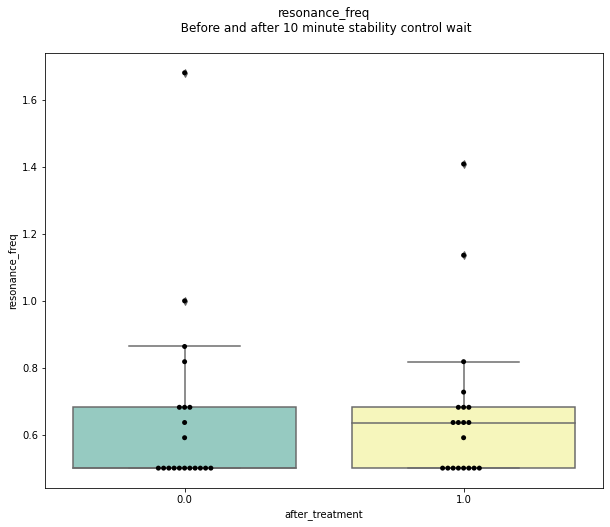

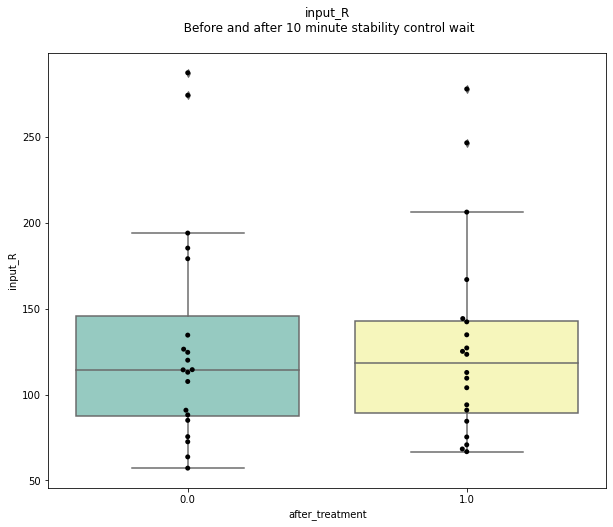

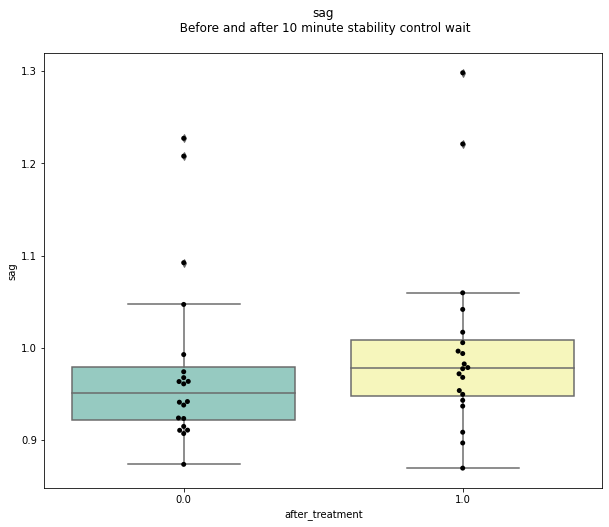

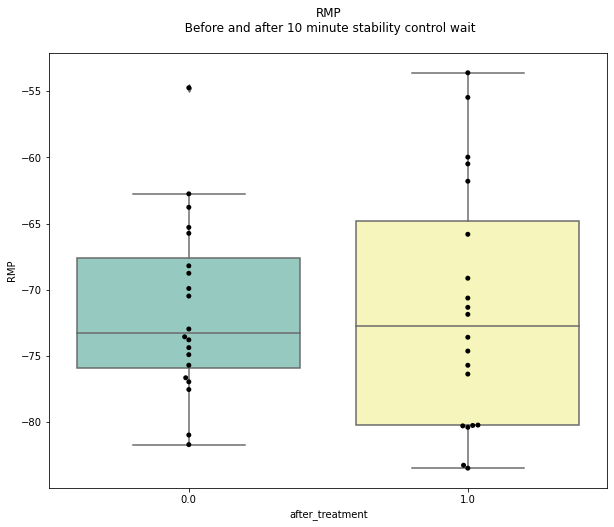

In [5]:
#boxplots before and after washin
for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP']:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x="after_treatment", y=i, data= stability, palette="Set3")
    sns.swarmplot(x="after_treatment", y=i, data= stability, color = 'black')
    plt.title('{}\n  Before and after 10 minute stability control wait \n'.format(i))

# Serotonin Experiments

In [6]:
#filter out serotonin experiments from full dataframe
serotonin = data[(data['treatment'] == "50uM 5-HT") & (data['common_potential'] != 1) ]
serotonin

,name,species,treatment,after_treatment,common_potential,cell_type,notes,AP_peak,AP_amp,max_dvdt,...,FI_600,FI_650,FI_700,FI_750,FI_800,FI_850,FI_900,Layer,topLeaf_label,AP_thres
18,H21.03.302.11.04.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,46.508789,83.809402,244.44580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-37.300613
19,H21.03.302.11.04.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,42.449951,82.281425,235.29053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-39.831474
24,Slc17a7-IRES2-Cre;Ai14-565033.11.10.01,mouse,50uM 5-HT,0.0,NaN,pyramidal,NaN,43.792725,77.787842,289.91699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.995117
25,Slc17a7-IRES2-Cre;Ai14-565033.11.10.01,mouse,50uM 5-HT,1.0,NaN,pyramidal,NaN,44.433594,79.989258,339.96582,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.555664
26,Vip-IRES-Cre;Ai14-564742.11.10.01,mouse,50uM 5-HT,0.0,NaN,pyramidal,NaN,50.140381,86.741447,403.74756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.601066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,H21.03.309.11.05.02.01,human,50uM 5-HT,1.0,0.0,pyramidal,NaN,63.415527,99.778160,335.99854,...,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.362633
86,Q21.26.009.11.03,NHP,50uM 5-HT,0.0,0.0,pyramidal,NaN,62.927246,95.120224,357.97119,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.192978
87,Q21.26.009.11.03,NHP,50uM 5-HT,1.0,0.0,pyramidal,NaN,62.683105,92.722176,327.75879,...,15.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.039071
88,Q21.26.009.11.13,NHP,50uM 5-HT,0.0,0.0,pyramidal,NaN,51.147461,85.316597,263.97705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.169136


### Human serotonin experiments only

In [7]:
serotonin_H = data[(data['treatment'] == "50uM 5-HT") & (data['species'] == "human") & (data['common_potential'] != 1)]
serotonin_H

,name,species,treatment,after_treatment,common_potential,cell_type,notes,AP_peak,AP_amp,max_dvdt,...,FI_600,FI_650,FI_700,FI_750,FI_800,FI_850,FI_900,Layer,topLeaf_label,AP_thres
18,H21.03.302.11.04.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,46.508789,83.809402,244.44580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-37.300613
19,H21.03.302.11.04.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,42.449951,82.281425,235.29053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-39.831474
28,H21.03.304.11.05.01.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,54.931641,92.600197,269.77539,...,28.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.668556
29,H21.03.304.11.05.01.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,47.882080,88.057129,236.51123,...,30.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,-40.175049
30,H21.03.304.11.05.02.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,65.917969,89.698044,273.13232,...,27.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.780075
31,H21.03.304.11.05.02.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,64.208984,85.812714,249.63379,...,27.0,29.0,31.0,32.0,NaN,NaN,NaN,NaN,NaN,-21.603730
32,H21.03.304.11.06.01.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,55.877686,90.550064,288.08594,...,21.0,23.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,-34.672378
33,H21.03.304.11.06.01.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,47.546387,88.796288,274.04785,...,19.0,23.0,23.0,23.0,NaN,NaN,NaN,NaN,NaN,-41.249901
46,H21.06.351.11.04.01.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,54.534912,87.150024,239.86816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.615112
47,H21.06.351.11.04.01.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,52.124023,88.053764,248.41309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.929741


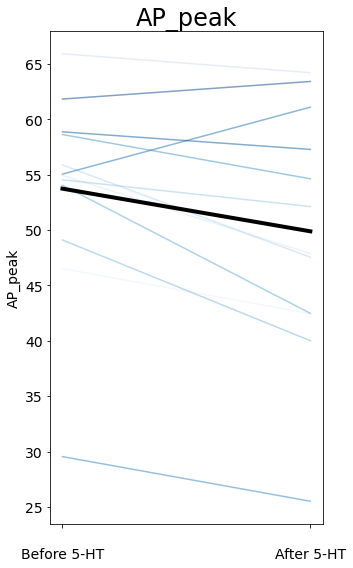

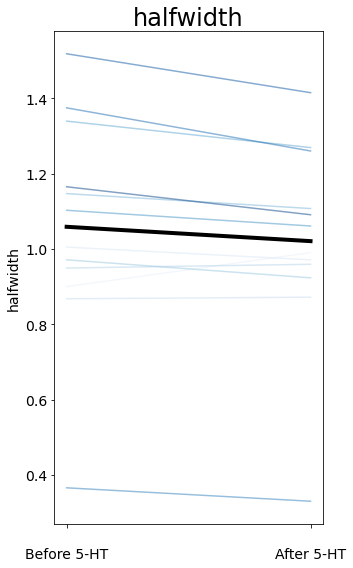

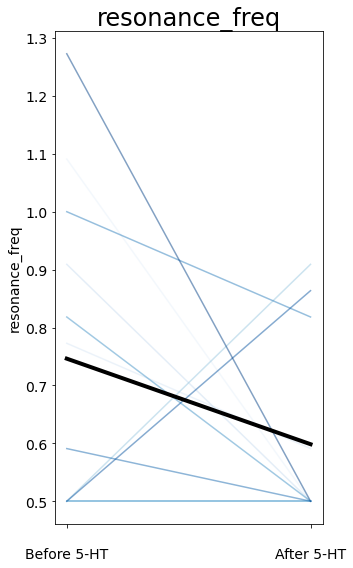

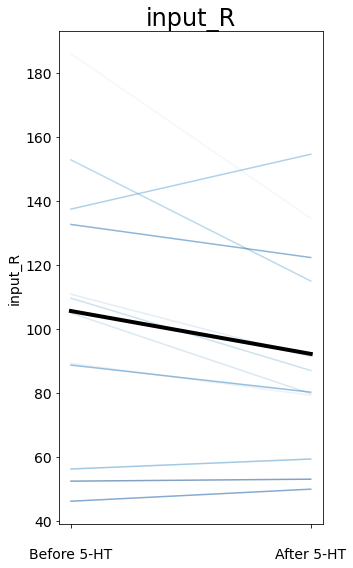

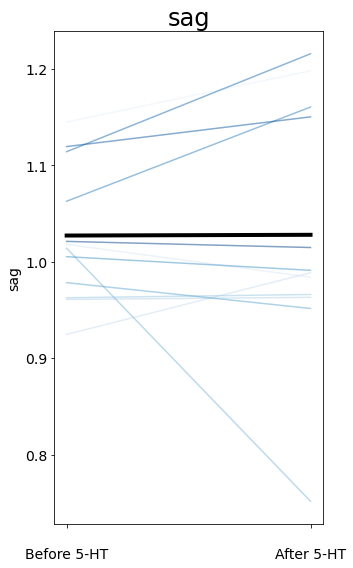

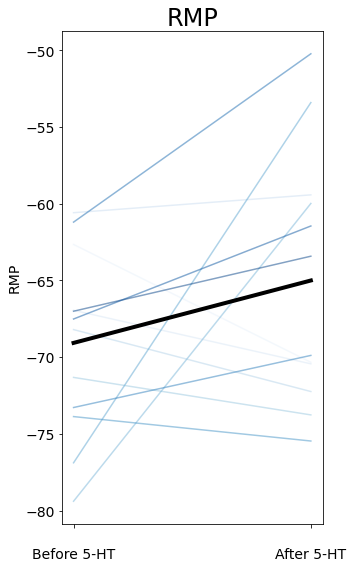

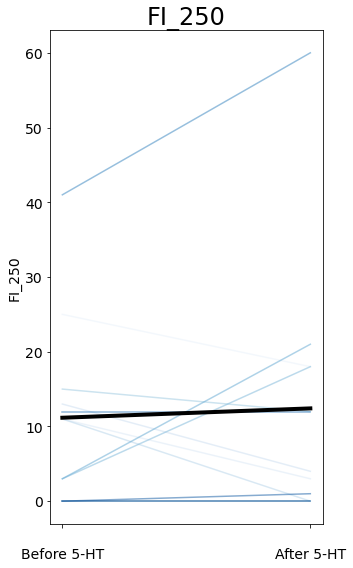

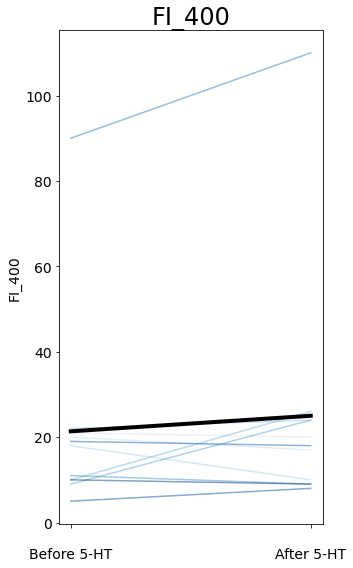

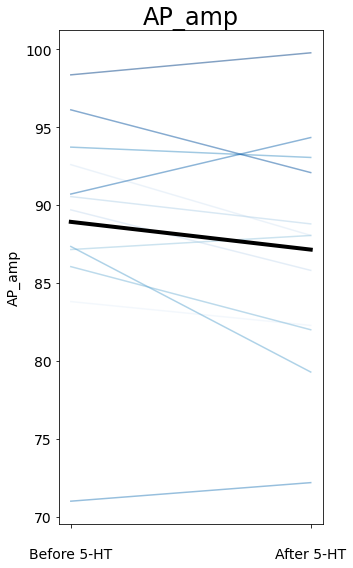

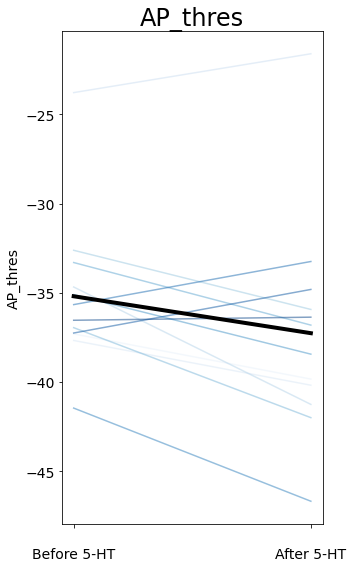

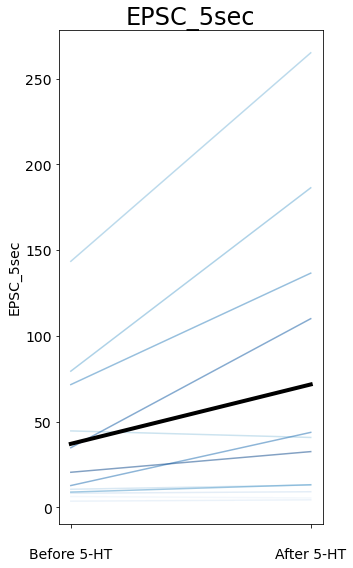

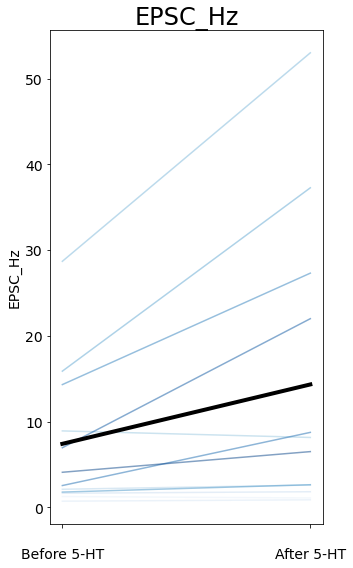

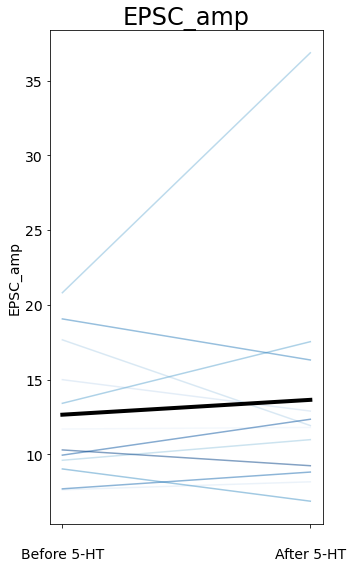

In [9]:
agg_H = serotonin_H.groupby(by='after_treatment').mean()

for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP','FI_250','FI_400', 'AP_amp', 'AP_thres', 'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp']:
    plt.figure(figsize=(5, 8))
    sns.lineplot(
        data=serotonin_H,
        x="after_treatment", y=i, hue="name",
        markers=True, legend=False, palette="Blues", alpha= 0.5)

    sns.lineplot(data=agg_H[i], color="black", linewidth = 4)
    plt.xticks( [0,1], labels=["\nBefore 5-HT", "\nAfter 5-HT"], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel(i,fontsize=14)
    plt.title('{}'.format(i), fontsize=24)
    plt.tight_layout()

## Metadata

In [10]:
metadata = pd.read_csv("Psilocybin_google_220701.csv")

In [11]:
metadata_short = metadata.loc[:,['File','tube ID','Fill','Layer estimate','Depth from pia', 'Brain Region','Drug Treatment']]

In [12]:
#merge experiment data with metadata

merged = pd.merge(left = serotonin_H, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

merged.head()


merged_all = pd.merge(left = serotonin, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

Text(0.5, 1.0, 'Change in RMP in Response to 5HT Correlates with Depth\n')

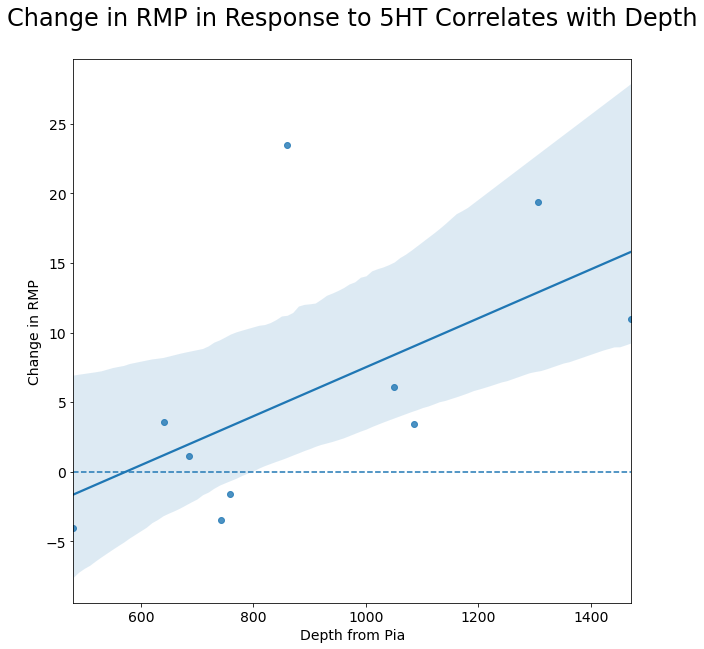

In [13]:
a = (merged[merged["after_treatment"] == 1])
a = a.reset_index()


b = (merged[merged["after_treatment"] == 0])
b = b.reset_index()

a["change_RMP"] = a["RMP"]- b["RMP"]

plt.figure(figsize = (10,10))
sns.regplot(data=a, x="Depth from pia", y="change_RMP")
plt.axhline(0, ls='--')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Change in RMP",fontsize=14)
plt.title('Change in RMP in Response to 5HT Correlates with Depth\n', fontsize=24)

Text(0.5, 1.0, 'Change in EPSC Hz in Response to 5HT Correlates with Depth\n')

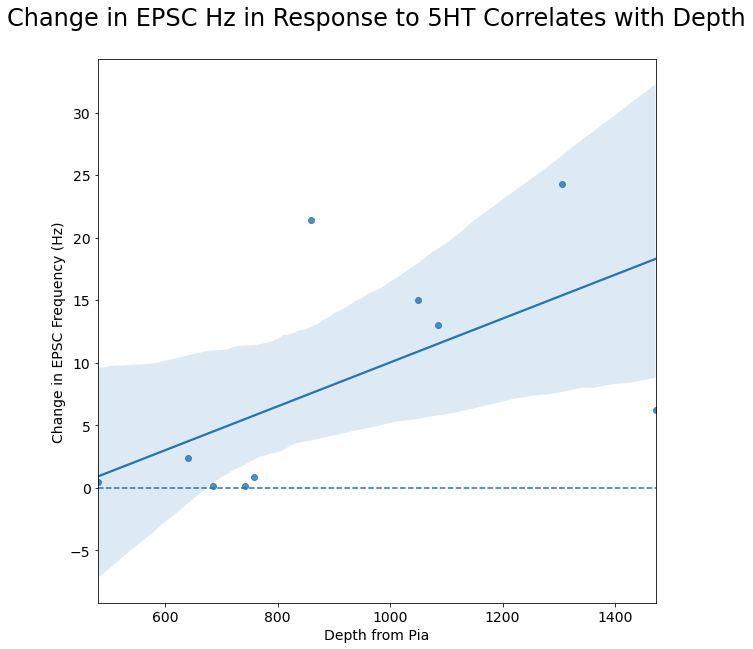

In [14]:
a["change_EPSC"] = a["EPSC_Hz"]- b["EPSC_Hz"]

plt.figure(figsize = (10,10))
sns.regplot(data=a, x="Depth from pia", y="change_EPSC")
plt.axhline(0, ls='--')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Change in EPSC Frequency (Hz)",fontsize=14)
plt.title('Change in EPSC Hz in Response to 5HT Correlates with Depth\n', fontsize=24)

# Psilocybin Analysis

In [20]:
#filter to only human psilocybin washin experiments
psilocybin_H = data[(data['treatment'] == "50uM psilocybin") & (data['species'] == "human") & (data['common_potential'] != 1)]

In [21]:
psilocybin_M = data[(data['treatment'] == "50uM psilocybin") & (data['species'] == "mouse")]

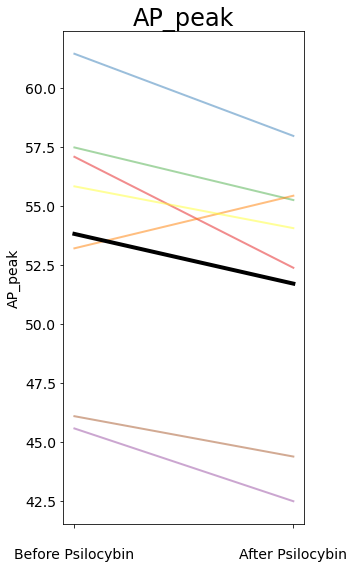

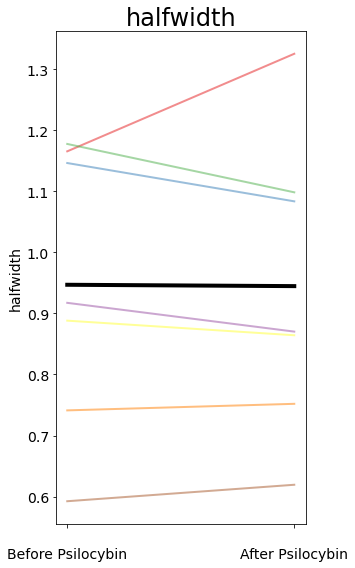

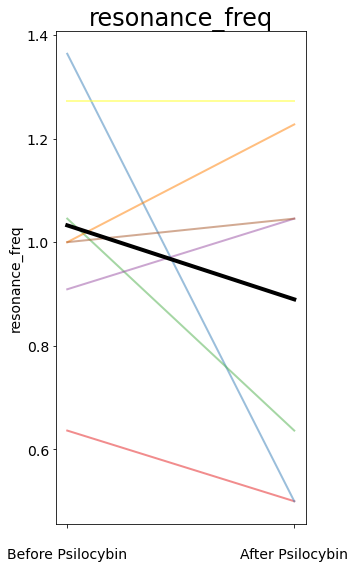

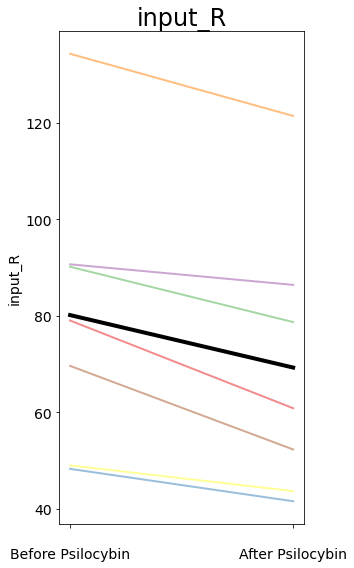

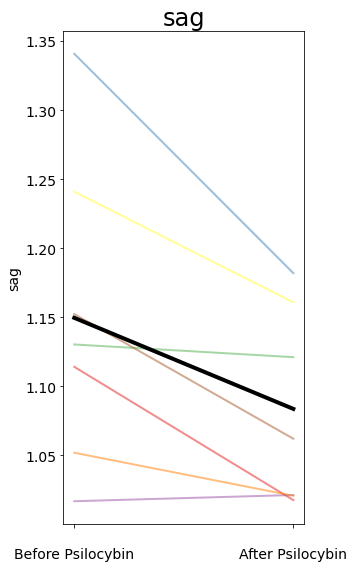

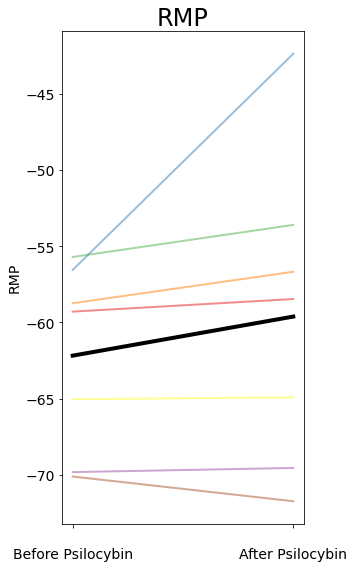

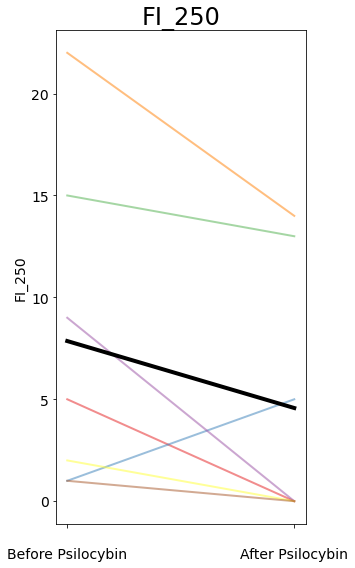

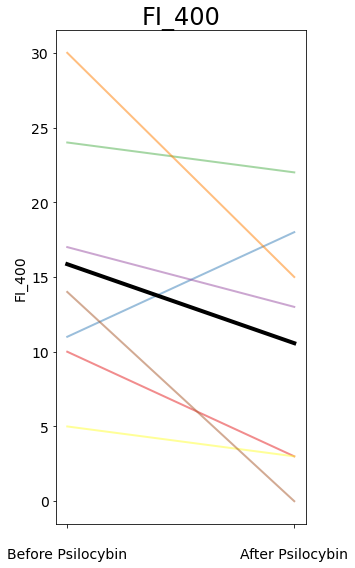

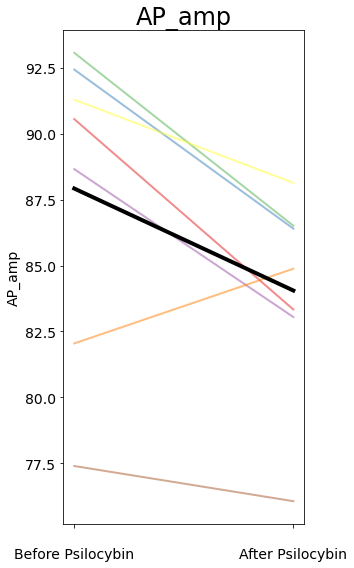

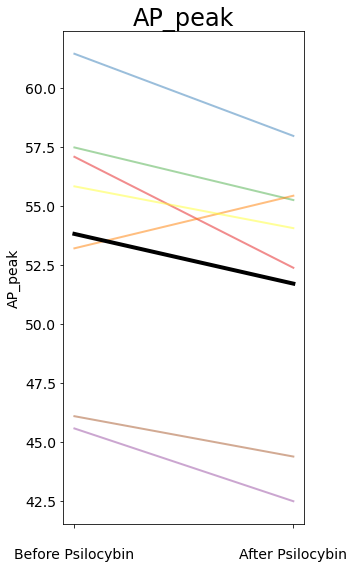

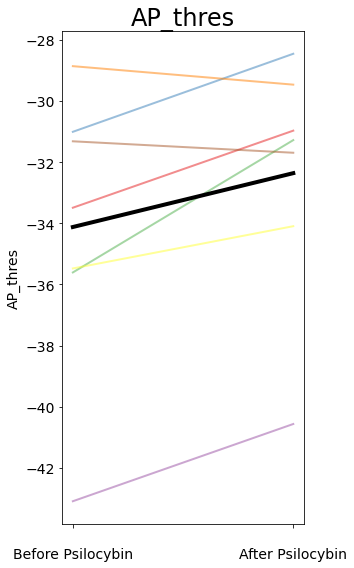

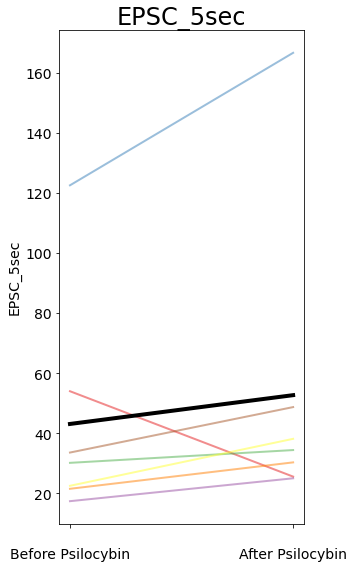

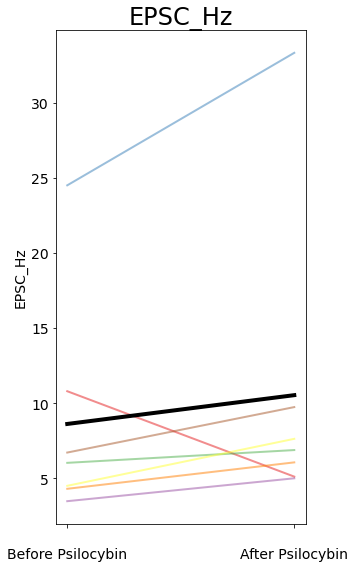

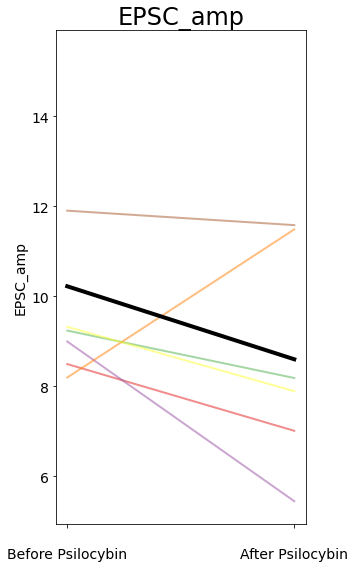

In [22]:
#human psilocybin washin experiments
agg_H = psilocybin_H.groupby(by='after_treatment').mean()

for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP','FI_250','FI_400', 'AP_amp', 'AP_peak','AP_thres', 'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp']:
    plt.figure(figsize=(5, 8))
    sns.lineplot(
        data=psilocybin_H,
        x="after_treatment", y=i, hue="name",
        markers=True, legend=False, palette="Set1", alpha= .5, linewidth=2)

    sns.lineplot(data=agg_H[i], color="black", linewidth = 4)
    plt.xticks( [0,1], labels=["\nBefore Psilocybin", "\nAfter Psilocybin"], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel(i,fontsize=14)
    plt.title('{}'.format(i), fontsize=24)
    plt.tight_layout()

### add metadata

In [23]:
merged_p = pd.merge(left = psilocybin_H, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

Text(0.5, 1.0, 'Change in RMP in Response to psilocybin Correlates with Depth?\n')

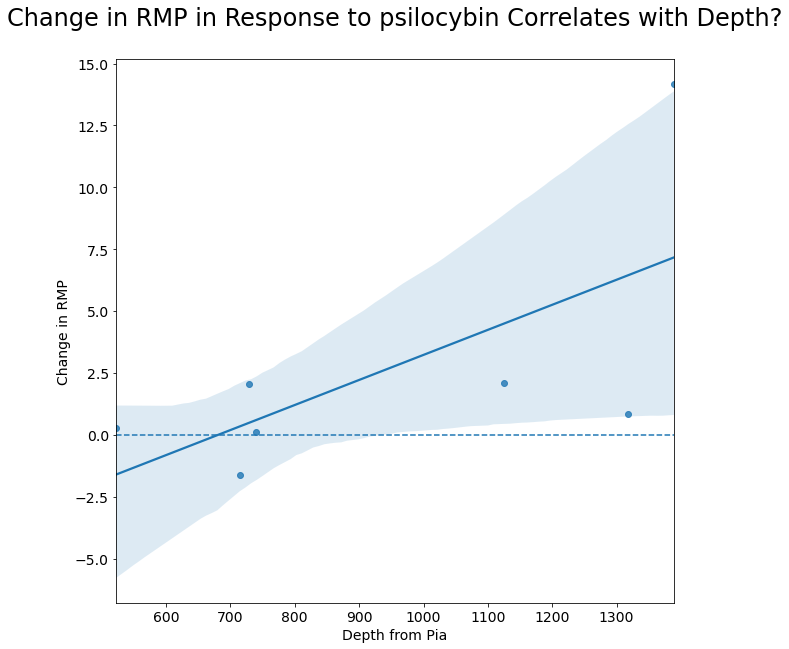

In [24]:
p = (merged_p[merged_p["after_treatment"] == 1])
p = p.reset_index()


j = (merged_p[merged_p["after_treatment"] == 0])
j = j.reset_index()

p["change_RMP"] = p["RMP"]- j["RMP"]
plt.figure(figsize = (10,10))
sns.regplot(data=p, x="Depth from pia", y="change_RMP")
plt.axhline(0, ls='--')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Change in RMP",fontsize=14)
plt.title('Change in RMP in Response to psilocybin Correlates with Depth?\n', fontsize=24)

Text(0.5, 1.0, 'Max Change in RMP During Psilocybin Washin by Depth\n')

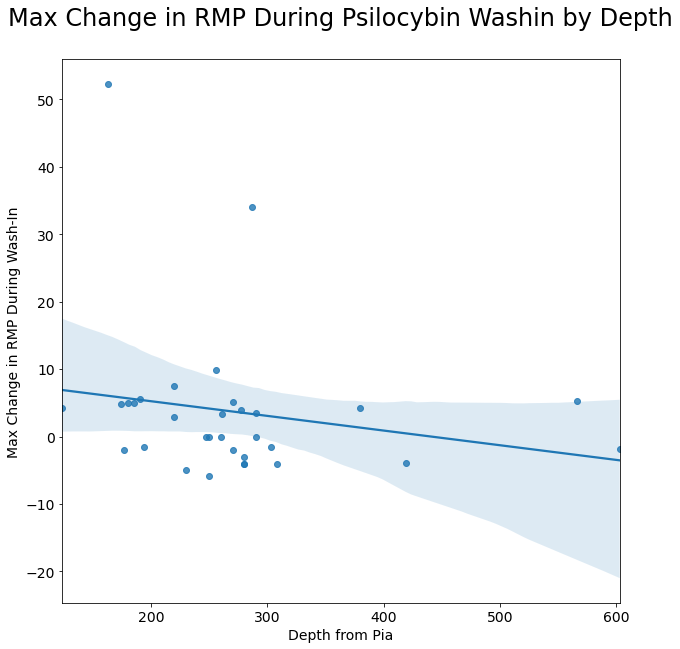

In [25]:
merged_p4 = pd.merge(left = psilocybin_M, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p4 = (merged_p4[merged_p4["after_treatment"] == 1])
p4 = p4.reset_index()


plt.figure(figsize = (10,10))
sns.regplot(data=p4, x="Depth from pia", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Psilocybin Washin by Depth\n', fontsize=24)

Text(0.5, 1.0, 'Max Change in RMP During Psilocybin Washin against EPSC_Hz\n')

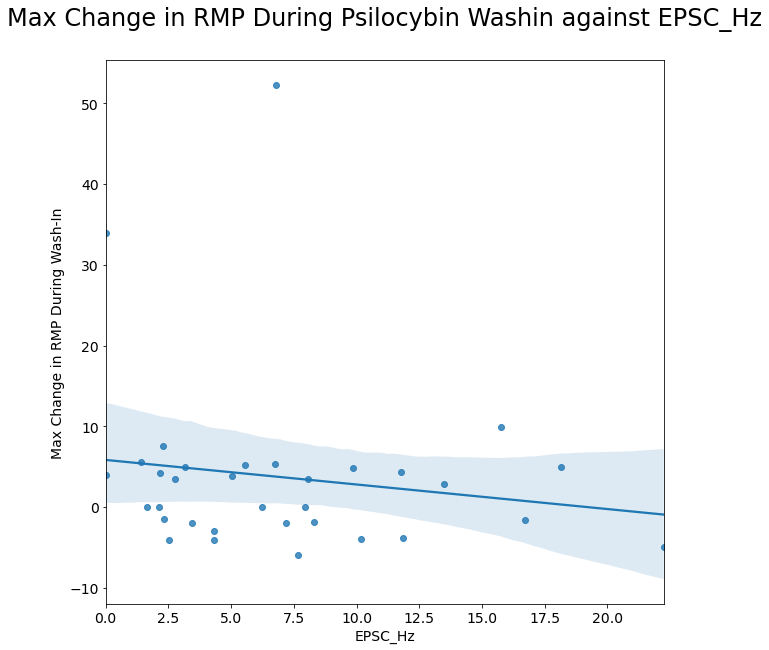

In [26]:
plt.figure(figsize = (10,10))
sns.regplot(data=p4, x="EPSC_Hz", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('EPSC_Hz', fontsize=14)
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Psilocybin Washin against EPSC_Hz\n', fontsize=24)

Text(0.5, 1.0, 'Histogram of Change in RMP During Psilocybin Washin\n')

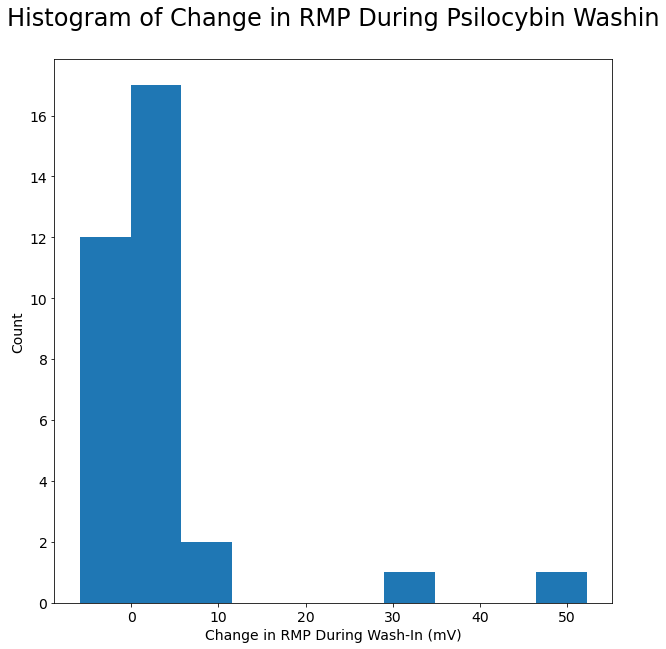

In [27]:
plt.figure(figsize = (10,10))
#sns.histplot(data=p4, x="washin_change")
plt.hist(p4["washin_change"])

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Change in RMP During Wash-In (mV)', fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title('Histogram of Change in RMP During Psilocybin Washin\n', fontsize=24)

# Psilocin Analysis

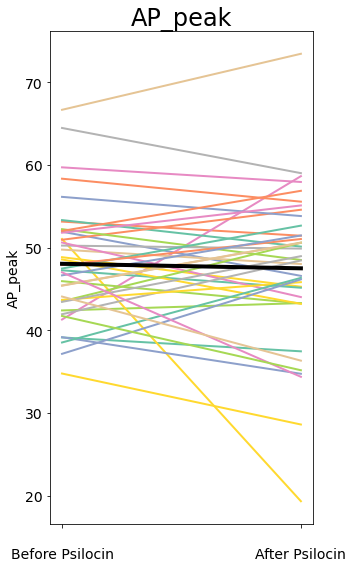

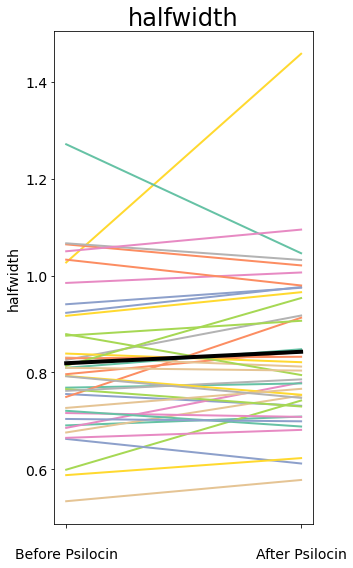

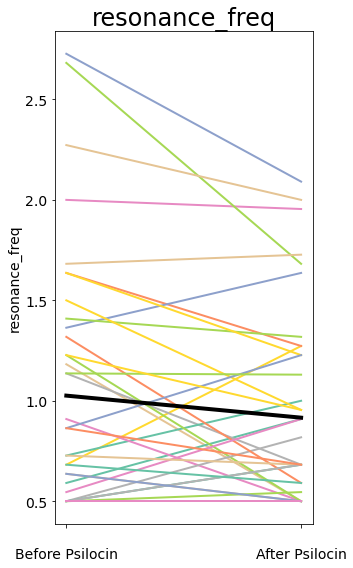

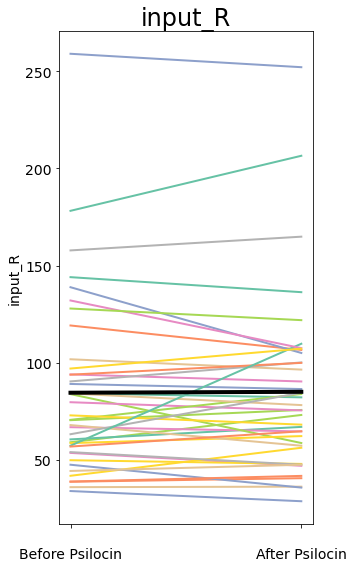

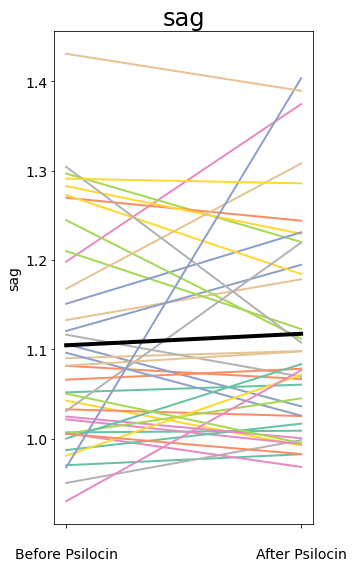

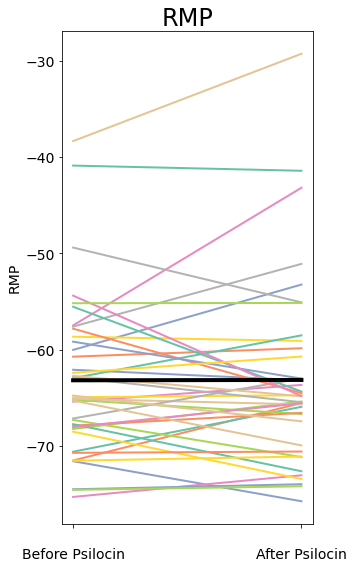

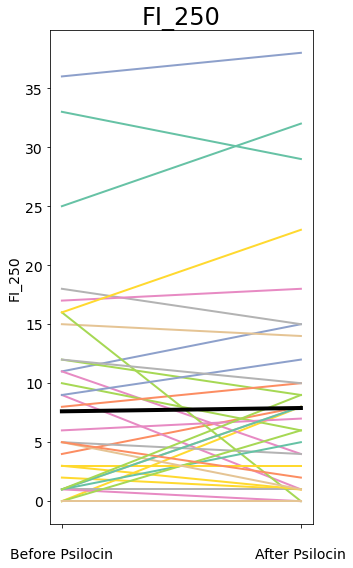

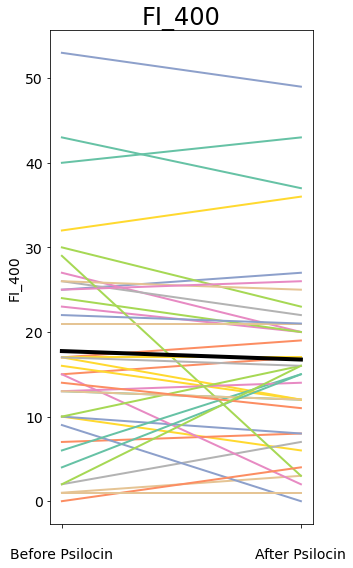

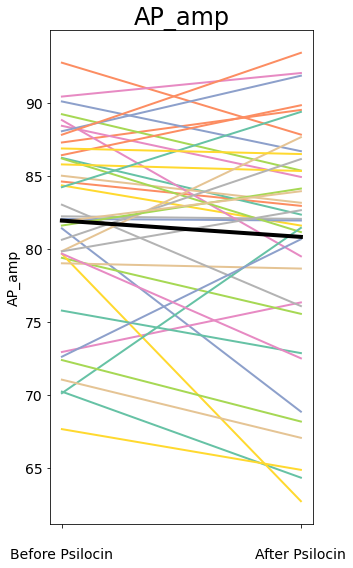

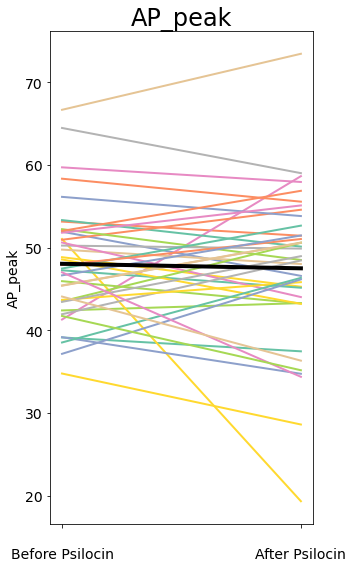

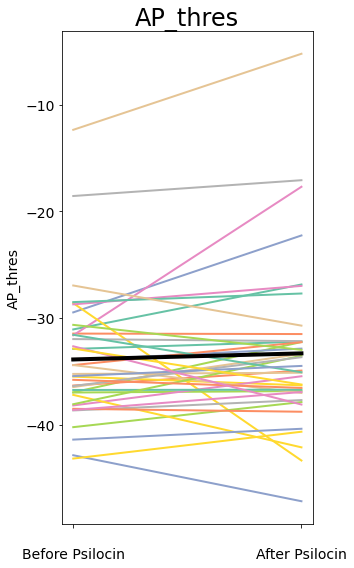

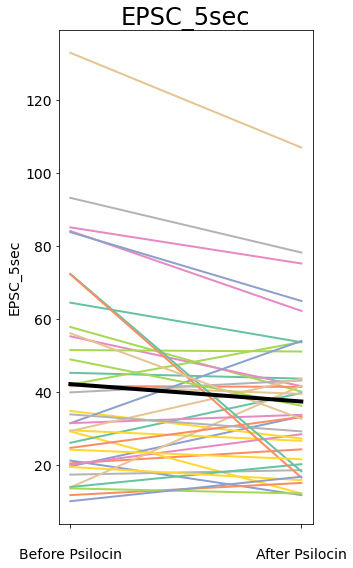

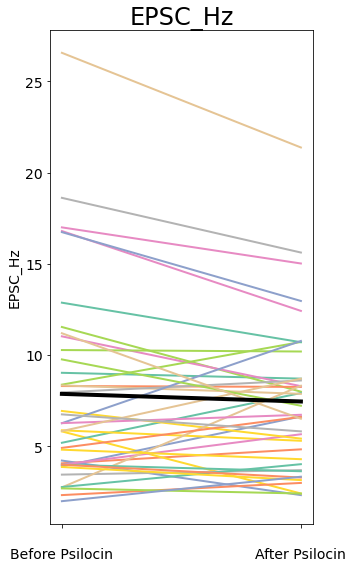

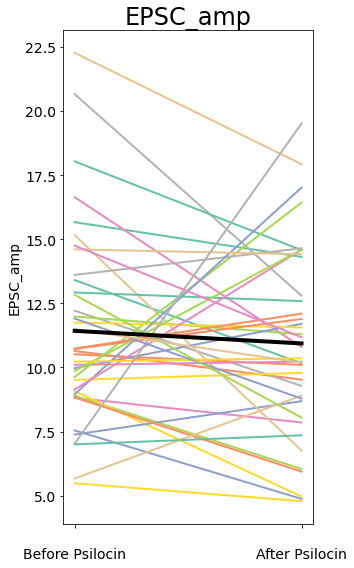

In [31]:
#filter to only human psilocin washin experiments
#population plots

psilocin_H = data[(data['treatment'].str.contains("psilocin")) & (data['species'] == "human") & (data['common_potential'] != 1)]

agg_H = psilocin_H.groupby(by='after_treatment').mean()

for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP','FI_250','FI_400', 'AP_amp', 'AP_peak','AP_thres', 'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp']:
    plt.figure(figsize=(5, 8))
    sns.lineplot(
        data=psilocin_H,
        x="after_treatment", y=i, hue="name",
        markers=True, legend=False, palette="Set2", alpha= 1, linewidth=2)

    sns.lineplot(data=agg_H[i], color="black", linewidth = 4)
    plt.xticks( [0,1], labels=["\nBefore Psilocin", "\nAfter Psilocin"], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel(i,fontsize=14)
    plt.title('{}'.format(i), fontsize=24)
    plt.tight_layout()

Text(0.5, 1.0, 'Max Change in RMP During Human Psilocin Washin\n')

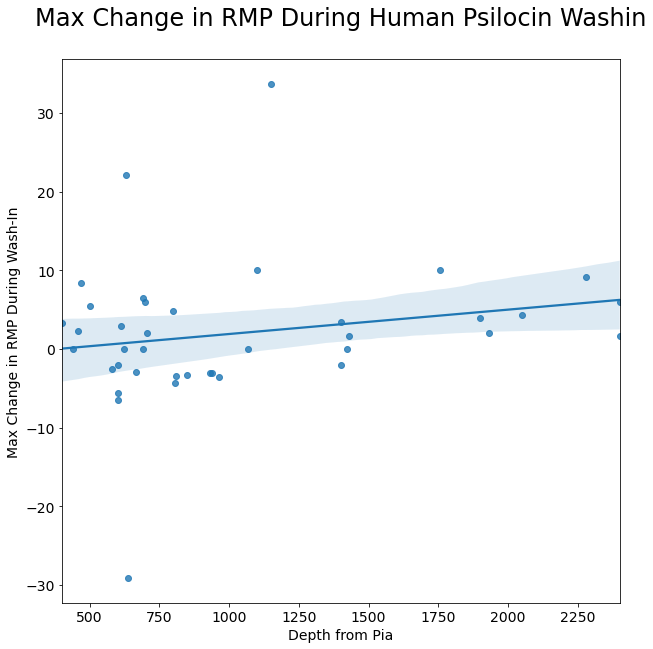

In [32]:
merged_p2 = pd.merge(left = psilocin_H, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p2 = (merged_p2[merged_p2["after_treatment"] == 1])
p2 = p2.reset_index()


plt.figure(figsize = (10,10))
sns.regplot(data=p2, x="Depth from pia", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Human Psilocin Washin\n', fontsize=24)

### mouse psilocin

In [33]:
psilocin_M = data[(data['treatment'].str.contains("psilocin")) & (data['species'] == "mouse") & (data['common_potential'] != 1)]

In [34]:
#check avg change in RMP
psilocin_M[psilocin_M["after_treatment"] == 1]["RMP"].mean() - psilocin_M[psilocin_M["after_treatment"] == 0]["RMP"].mean()

1.4872956435137894

Text(0.5, 1.0, 'Max Change in RMP During Psilocin Washin by Depth\n')

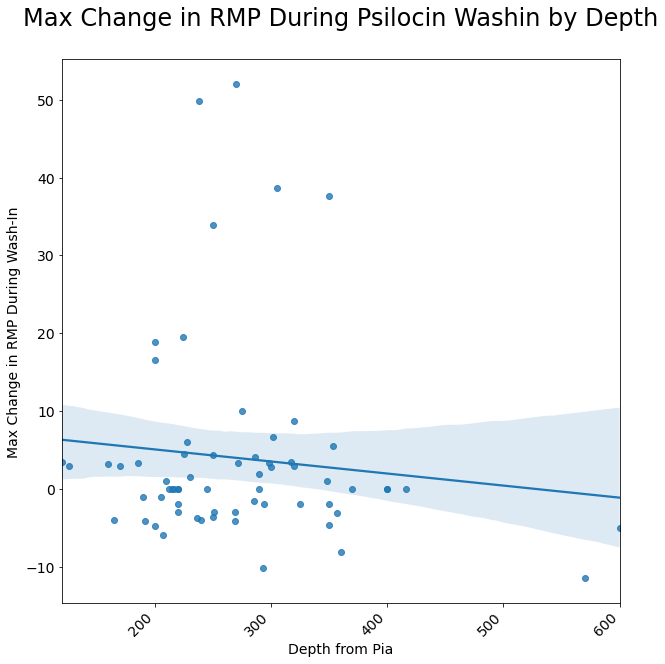

In [35]:
merged_p3 = pd.merge(left = psilocin_M, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p3 = (merged_p3[merged_p3["after_treatment"] == 1])
p3 = p3.reset_index()


plt.figure(figsize = (10,10))
sns.regplot(data=p3[p3['Brain Region'] != 'CLA'], x="Depth from pia", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Psilocin Washin by Depth\n', fontsize=24)

# Antagonist - Ketanserin

Mouse washin experiments with psilocin + ketanserin (5ht2a antagonist)

In [36]:
psilocin_ketanserin_wash = pd.read_csv('psilocin_ketanserin_washin.csv')
psilocin_ketanserin_wash.set_index('seconds', inplace =True)

In [37]:
norm2 = psilocin_ketanserin_wash -  psilocin_ketanserin_wash.iloc[0,:]

(0.0, 600.0)

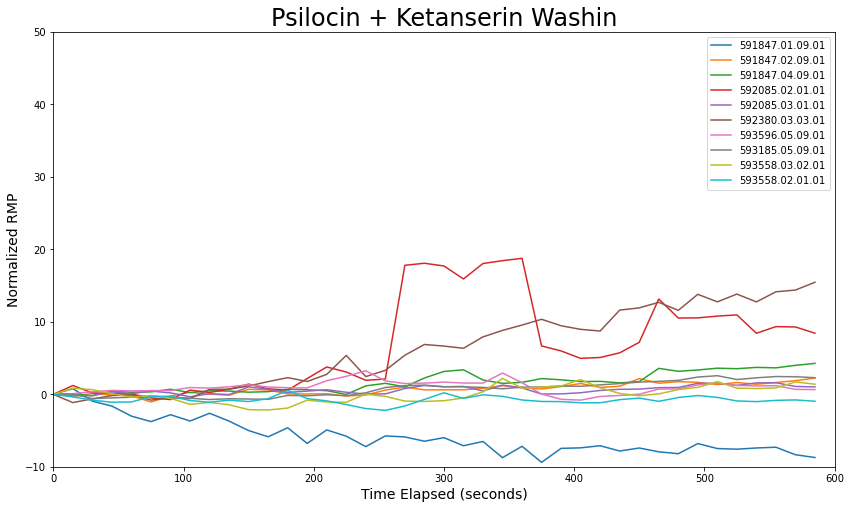

In [38]:
plt.figure(figsize = (14,8))
sns.lineplot(data=norm2, dashes=False)
plt.xlabel('Time Elapsed (seconds)', fontsize=14)
plt.ylabel("Normalized RMP",fontsize=14)
plt.title('Psilocin + Ketanserin Washin', fontsize=24)
plt.ylim(-10,50)
plt.xlim(0,600)

## Mouse hyperpolarizing cell washin
#### Filter out mouse cells that hyperpolarize and visualize their reponse

In [39]:
hyp_wash = pd.read_csv('mouse_hyperpolarization_washin.csv')
hyp_wash.set_index('seconds', inplace =True)
norm4 = hyp_wash - hyp_wash.iloc[0,:]

(0.0, 600.0)

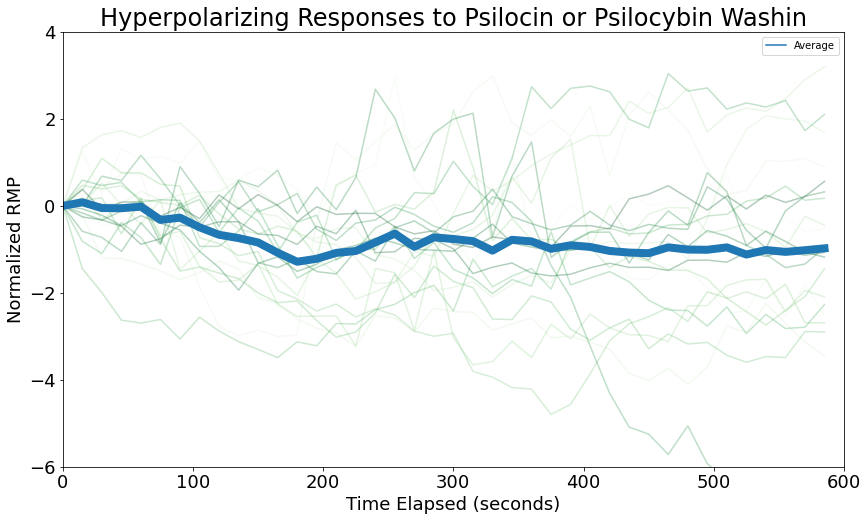

In [40]:
plt.figure(figsize = (14,8))
sns.lineplot(data=norm4.iloc[:,:-1], palette='Greens', dashes=False,alpha=.3, legend=False)
sns.lineplot(data=norm4.iloc[:,-1:], linewidth=8, color= "black")
plt.xlabel('Time Elapsed (seconds)', fontsize=18)
plt.ylabel("Normalized RMP",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Hyperpolarizing Responses to Psilocin or Psilocybin Washin', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-6,4)
plt.xlim(0,600)

# Transcriptomic Analysis 
#### RNAseq gene expression levels from shiny

In [42]:

t = pd.read_csv("distillery_selection_human_220701.csv")

#sorts out Macaque samples
human = t[t['cell_name_label'].str.contains("H")]

In [43]:
#selecting only important columns
human_short = human.loc[:,["cell_name_label",'rna_amplification_pass_fail_label', "seurat_cluster_label", "Tree_first_cl_label", "topLeafValue_label", "patchseq_roi_label", "postPatch_label", "marker_genes", "Tree_call_label"]]

In [44]:
#merge with metadata
human_T = pd.merge(left = human_short, 
                    right = metadata_short, 
                    left_on = 'cell_name_label', 
                    right_on = 'File', 
                    how = 'inner')
human_T

,cell_name_label,rna_amplification_pass_fail_label,seurat_cluster_label,Tree_first_cl_label,topLeafValue_label,patchseq_roi_label,postPatch_label,marker_genes,Tree_call_label,File,tube ID,Fill,Layer estimate,Depth from pia,Brain Region,Drug Treatment
0,H21.03.304.11.05.02.01,Pass,Exc L2-3 LINC00507 FREM3,Exc L2 LAMP5 LTK,1.00,TCx3,nucleus_present,"Exc L2 LAMP5 LTK:LINC01500 PCSK6,L2-L3|b:LINC0...",Core,H21.03.304.11.05.02.01,PYS4_210216_352_A01,y,3,686.0,TCx,50uM 5-HT
1,H21.03.304.11.06.01.01,Pass,Exc L2 LAMP5 LTK,Exc L2 LAMP5 LTK,0.97,TCx3,nucleus_present,"Exc L2 LAMP5 LTK:LINC01500,L2-L3|b:LINC01500 C...",Core,H21.03.304.11.06.01.01,PYS4_210216_353_A01,y,3,480.0,TCx,50uM 5-HT
2,H21.03.315.11.08.01.01,Pass,Exc L2-3 LINC00507 FREM3,Exc L2 LAMP5 LTK,0.88,TCx2,nucleus_present,"Exc L2 LAMP5 LTK:LINC01500 PCSK6,L2-L3|b:LINC0...",I1,H21.03.315.11.08.01.01,PYS4_210817_353_A01,n,2,470.0,TCx,50uM psilocin
3,H21.06.356.11.07.01.01,Pass,Exc L2 LAMP5 LTK,Exc L2 LAMP5 LTK,0.74,FCx2,nucleus_present,"Exc L2 LAMP5 LTK:LINC01500,L2-L3|b:LINC01500 C...",I1,H21.06.356.11.07.01.01,PYS4_210818_351_A01,n,2,440.0,FCx,50uM psilocin
4,H21.03.311.11.06.01.01,Pass,Exc L2-4 LINC00507 GLP2R,Exc L2-4 LINC00507 GLP2R,0.95,TCx3,nucleus_present,Exc L2-4 LINC00507 GLP2R:LOC105373896 LOC10537...,Core,H21.03.311.11.06.01.01,PYS4_210427_353_A01,y,3,729.0,FTCx,50uM psilocybin
5,H21.06.357.11.06.01.01,Pass,Exc L2-4 LINC00507 GLP2R,Exc L2-4 LINC00507 GLP2R,0.93,FCx3,nucleus_present,Exc L2-4 LINC00507 GLP2R:LOC105373896 LOC10537...,Core,H21.06.357.11.06.01.01,PYS4_210827_351_A01,y,3,715.0,FCx,50uM psilocybin
6,H22.03.301.11.07.01.01,Pass,Exc L2-4 LINC00507 GLP2R,Exc L2-4 LINC00507 GLP2R,0.91,TCx3,nucleus_present,Exc L2-4 LINC00507 GLP2R:LOC105373896 LOC10537...,Core,H22.03.301.11.07.01.01,PYS4_220223_351_A01,y,3,1400.0,TCx,50uM psilocin + 0.1mM ascorbate in DMSO
7,H21.06.356.11.08.01.01,Pass,Exc L2-4 LINC00507 GLP2R,Exc L2-4 LINC00507 GLP2R,0.83,FCx3,nucleus_absent,Exc L2-4 LINC00507 GLP2R:LOC105373896 LOC10537...,I1,H21.06.356.11.08.01.01,PYS4_210818_353_A01,n,3,602.0,FCx,50uM psilocin
8,H22.26.405.11.03.01.01,Pass,Exc L2-3 LINC00507 FREM3,Exc L2-4 LINC00507 GLP2R,0.83,TCx2,nucleus_present,Exc L2-4 LINC00507 GLP2R:LOC105373896 LOC10537...,I1,H22.26.405.11.03.01.01,PYS4_220131_351_A01,n,2,400.0,FTCx,50uM psilocin + 0.1mM ascorbate in DMSO
9,H21.26.409.11.04.01.01,Pass,Exc L2-4 LINC00507 GLP2R,Exc L2-4 LINC00507 GLP2R,0.80,FCx3,nucleus_present,Exc L2-4 LINC00507 GLP2R:LOC105373896 LOC10537...,I1,H21.26.409.11.04.01.01,PYS4_211215_351_A01,y,3,611.0,FCx,50uM psilocin + 0.1mM ascorbate in DMSO


In [45]:
human_T.to_csv("human_mapping.csv")

In [46]:
#print("Human 5HT RNA PASS:", len(human_T[(human_T['rna_amplification_pass_fail_label'] == 'Pass') & (human_T['Drug Treatment'] == '50uM 5-HT')]))
print("Human 5HT mapping PASS:", len(human_T[(human_T['Tree_call_label'] != 'PoorQ') & (human_T['Drug Treatment'] == '50uM 5-HT')]))
#print("Human 5HT fill PASS:", len(human_T[(human_T['Fill'] == 'y') & (human_T['Drug Treatment'] == '50uM 5-HT')]))

#print("\nHuman psilocybin RNA PASS:", len(human_T[(human_T['rna_amplification_pass_fail_label'] == 'Pass') & (human_T['Drug Treatment'] == '50uM psilocybin')]))
print("Human psilocybin mapping PASS:", len(human_T[(human_T['Tree_call_label'] != 'PoorQ') & (human_T['Drug Treatment'] == '50uM psilocybin')]))
#print("Human psilocybin fill PASS:", len(human_T[(human_T['Fill'] == 'y') & (human_T['Drug Treatment'] == '50uM psilocybin')]))

#print("\nHuman psilocin RNA PASS:", len(human_T[(human_T['rna_amplification_pass_fail_label'] == 'Pass') & (human_T['Drug Treatment'] == '50uM psilocin')]))
print("Human psilocin mapping PASS:", len(human_T[(human_T['Tree_call_label'] != 'PoorQ') & (human_T['Drug Treatment'].str.contains('psilocin'))]))
#print("Human psilocin fill PASS:", len(human_T[(human_T['Fill'] == 'y') & (human_T['Drug Treatment'] == '50uM psilocin')]))


Human 5HT mapping PASS: 5
Human psilocybin mapping PASS: 3
Human psilocin mapping PASS: 28


In [47]:
#contains info such as RNA pass/fail 
amp = pd.read_csv('Copy of Amp_Patch-results_ongoing_220701_thru_A-220627.csv')


merge_amp = pd.merge(left = amp, 
                    right = metadata_short, 
                    left_on = 'Sample ID', 
                    right_on = 'tube ID', 
                    how = 'inner')
merge_amp

/home/maciej/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (27,28,29,50,51,54,55,56,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,F/P,Operator,MouseLineDistilled,MouseLine no Region,%400-10000bpdistilled,PatchDateDistilled,Bimodal?,Species,DonorDistilled,Human specimen by year,...,Tubeset Batch Name,Tubeset Date,Experiment Component Name,File,tube ID,Fill,Layer estimate,Depth from pia,Brain Region,Drug Treatment
0,P,P8S4,Vip-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai193(TICL-EG...,Vip-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai193(TICL-EG...,54.4,1/14/2021,not indicated,Mouse,562577,NaN,...,NaN,NaN,NaN,Vip-IRES-Cre;Sst-IRES-FlpO;Ai193-hyg-562577.11...,P8S4_210114_351_A01,NaN,2/3,NaN,VISp,NaN
1,P,P8S4,Slc17a7-IRES2-Cre/wt;Ai14(RCL-tdT)/wt_VISp,Slc17a7-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,51.7,1/14/2021,not indicated,Mouse,561512,NaN,...,NaN,NaN,NaN,Slc17a7-IRES2-Cre;Ai14-561512.02.09.01,P8S4_210114_352_A01,NaN,2/3,NaN,VISp,NaN
2,P,P8S4,Slc17a6-IRES-Cre/wt;Ai14(RCL-tdT)/wt_VISp,Slc17a6-IRES-Cre/wt;Ai14(RCL-tdT)/wt,55.5,1/19/2021,not indicated,Mouse,561991,NaN,...,NaN,NaN,NaN,Slc17a6-IRES-Cre;Ai14-561991.02.09.01,P8S4_210119_351_A01,NaN,2/3,NaN,VISp,NaN
3,P,P8S4,Slc17a6-IRES-Cre/wt;Ai14(RCL-tdT)/wt_VISp,Slc17a6-IRES-Cre/wt;Ai14(RCL-tdT)/wt,43.8,1/19/2021,not indicated,Mouse,561991,NaN,...,NaN,NaN,NaN,Slc17a6-IRES-Cre;Ai14-561991.02.09.02,P8S4_210119_352_A01,NaN,2/3,NaN,VISp,NaN
4,P,P8S4,Vip-IRES-Cre/wt;Pvalb-T2A-FlpO/wt;Ai193(TICL-E...,Vip-IRES-Cre/wt;Pvalb-T2A-FlpO/wt;Ai193(TICL-E...,64.1,1/21/2021,not indicated,Mouse,563882,NaN,...,NaN,NaN,NaN,Vip-IRES-Cre;Pvalb-T2A-FlpO;Ai193-hyg-563882.1...,P8S4_210121_351_A01,NaN,2/3,NaN,MOp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,P,PYS4,Sst-IRES-Cre/wt;Ai14(RCL-tdT)/wt_PL,Sst-IRES-Cre/wt;Ai14(RCL-tdT)/wt,70.4,6/3/2022,not indicated,Mouse,628999,NaN,...,NaN,NaN,NaN,Sst-IRES-Cre;Ai14-628999.04.04.02,PYS4_220603_353_A01,y,5,570.0,PL,50uM psilocin + 0.1mM ascorbate in DMSO
209,P,PYS4,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt_RSPd,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt,61.1,6/8/2022,not indicated,Mouse,629891,NaN,...,NaN,NaN,NaN,Pvalb-IRES-Cre;Ai14-629891.15.04.01,PYS4_220608_351_A01,y,5,730.0,RSP,50uM psilocin + 0.1mM ascorbate in DMSO
210,P,PYS4,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt_RSPd,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt,70.6,6/8/2022,not indicated,Mouse,629892,NaN,...,NaN,NaN,NaN,Pvalb-IRES-Cre;Ai14-629892.15.04.01,PYS4_220608_352_A01,y,5,680.0,RSP,50uM psilocin + 0.1mM ascorbate in DMSO
211,P,PYS4,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt_RSPd,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt,65.1,6/8/2022,not indicated,Mouse,629892,NaN,...,NaN,NaN,NaN,Pvalb-IRES-Cre;Ai14-629892.13.04.01,PYS4_220608_353_A01,y,5,425.0,RSP,50uM psilocin + 0.1mM ascorbate in DMSO


In [48]:
#prints counts for tracking purposes

print("Mouse 5HT RNA PASS:", len(merge_amp[(merge_amp['Result pass/fail BA'] == 'Pass') & (merge_amp['Drug Treatment'] == '50uM 5-HT')& (merge_amp['Species'] == 'Mouse')]))
print("Mouse 5HT fill PASS:", len(merge_amp[(merge_amp['Fill'] == 'y') & (merge_amp['Drug Treatment'] == '50uM 5-HT')& (merge_amp['Species'] == 'Mouse')]))

print("\nMouse psilocybin RNA PASS:", len(merge_amp[(merge_amp['Result pass/fail BA'] == 'Pass') & (merge_amp['Drug Treatment'] == '50uM psilocybin')& (merge_amp['Species'] == 'Mouse')]))
print("Mouse psilocybin fill PASS:", len(merge_amp[(merge_amp['Fill'] == 'y') & (merge_amp['Drug Treatment'] == '50uM psilocybin')& (merge_amp['Species'] == 'Mouse')]))

print("\nMouse psilocin RNA PASS:", len(merge_amp[(merge_amp['Result pass/fail BA'] == 'Pass') & (merge_amp['Drug Treatment'].str.contains('psilocin'))& (merge_amp['Species'] == 'Mouse')]))
print("Mouse psilocin fill PASS:", len(merge_amp[(merge_amp['Fill'] == 'y') & (merge_amp['Drug Treatment'].str.contains('psilocin'))& (merge_amp['Species'] == 'Mouse')]))

print("\nHuman 5HT RNA PASS:", len(merge_amp[(merge_amp['Result pass/fail BA'] == 'Pass') & (merge_amp['Drug Treatment'] == '50uM 5-HT')& (merge_amp['Species'] == 'Human')]))
print("Human 5HT fill PASS:", len(merge_amp[(merge_amp['Fill'] == 'y') & (merge_amp['Drug Treatment'] == '50uM 5-HT')& (merge_amp['Species'] == 'Human')]))

print("\nHuman psilocybin RNA PASS:", len(merge_amp[(merge_amp['Result pass/fail BA'] == 'Pass') & (merge_amp['Drug Treatment'] == '50uM psilocybin')& (merge_amp['Species'] == 'Human')]))
print("Human psilocybin fill PASS:", len(merge_amp[(merge_amp['Fill'] == 'y') & (merge_amp['Drug Treatment'] == '50uM psilocybin')& (merge_amp['Species'] == 'Human')]))

print("\nHuman psilocin RNA PASS:", len(merge_amp[(merge_amp['Result pass/fail BA'] == 'Pass') & (merge_amp['Drug Treatment'].str.contains('psilocin'))& (merge_amp['Species'] == 'Human')]))
print("Human psilocin fill PASS:", len(merge_amp[(merge_amp['Fill'] == 'y') & (merge_amp['Drug Treatment'].str.contains('psilocin'))& (merge_amp['Species'] == 'Human')]))


Mouse 5HT RNA PASS: 11
Mouse 5HT fill PASS: 9

Mouse psilocybin RNA PASS: 30
Mouse psilocybin fill PASS: 11

Mouse psilocin RNA PASS: 88
Mouse psilocin fill PASS: 35

Human 5HT RNA PASS: 7
Human 5HT fill PASS: 7

Human psilocybin RNA PASS: 5
Human psilocybin fill PASS: 6

Human psilocin RNA PASS: 33
Human psilocin fill PASS: 26


### mouse transcriptomic

In [50]:
mouse = pd.read_csv("distillery_selection_mouse_220701.csv")
mouse_short = mouse.loc[:,["cell_name_label",'rna_amp_pass_fail_label',"subclass_label", "seurat_cluster_label", "Tree_first_cl_label", "topLeafValue_label", "patchseq_roi_label", "postPatch_label", "marker_genes", "Tree_call_label"]]


In [51]:
#merge with metadata
mouse_T = pd.merge(left = mouse_short, 
                    right = metadata_short, 
                    left_on = 'cell_name_label', 
                    right_on = 'File', 
                    how = 'inner')
mouse_T

,cell_name_label,rna_amp_pass_fail_label,subclass_label,seurat_cluster_label,Tree_first_cl_label,topLeafValue_label,patchseq_roi_label,postPatch_label,marker_genes,Tree_call_label,File,tube ID,Fill,Layer estimate,Depth from pia,Brain Region,Drug Treatment
0,Slc17a6-IRES-Cre;Ai14-561991.02.09.01,Pass,L2/3 IT,L2/3 IT VISp Rrad,L2/3 IT VISp Rrad,1.00,VISp2/3,nucleus_present,L2/3 IT VISp Rrad:Baz1a Csrnp1 Gpr3 Rrad Pim1 ...,Core,Slc17a6-IRES-Cre;Ai14-561991.02.09.01,P8S4_210119_351_A01,NaN,2/3,NaN,VISp,NaN
1,Htr3a-Cre_NO152;Ai14-589340.06.09.01,Pass,L2/3 IT,L2/3 IT VISp Rrad,L2/3 IT VISp Rrad,1.00,VISp2-3,nucleus_absent,L2/3 IT VISp Rrad:Baz1a Fosb Csrnp1 Rrad Tnfai...,Core,Htr3a-Cre_NO152;Ai14-589340.06.09.01,PYS4_210812_351_A01,n,3,238.0,VISp,50uM psilocin
2,Pvalb-IRES-Cre;Ai14-593185.05.09.01,Pass,L2/3 IT,L2/3 IT VISp Rrad,L2/3 IT VISp Rrad,1.00,VISp2-3,nucleus_present,L2/3 IT VISp Rrad:Baz1a Fosb Fosl2 Csrnp1 Rrad...,Core,Pvalb-IRES-Cre;Ai14-593185.05.09.01,PYS4_210908_351_A01,y,3,186.0,VISp,50uM psilocin + 5uM ketanserin
3,Pvalb-IRES-Cre;Ai14-600735.09.06.01,Pass,L2/3 IT,L2/3 IT VISp Rrad,L2/3 IT VISp Rrad,1.00,VISp2-3,nucleus_absent,L2/3 IT VISp Rrad:Baz1a Fosb Csrnp1 Fst Rrad T...,Core,Pvalb-IRES-Cre;Ai14-600735.09.06.01,PYS4_211021_352_A01,n,3,205.0,VISp,50uM psilocin
4,Pvalb-IRES-Cre;Ai14-604427.05.02.01,Pass,L2/3 IT,L2/3 IT VISp Rrad,L2/3 IT VISp Rrad,1.00,VISp2-3,nucleus_present,L2/3 IT VISp Rrad:Baz1a Fosb Fosl2 Csrnp1 Fst ...,Core,Pvalb-IRES-Cre;Ai14-604427.05.02.01,PYS4_211201_351_A01,y,3,170.0,VISp,50uM psilocin + 0.1mM ascorbate in DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Vip-IRES-Cre;Ai14-584471.05.04.01,Fail,L6 IT,L2/3 IT VISp Agmat,L6 IT VISp Car3,0.31,PL2-3,nucleus_absent,n3:,PoorQ,Vip-IRES-Cre;Ai14-584471.05.04.01,PYS4_210708_352_A01,NaN,3,250.0,PL,50uM psilocin
141,Htr3a-Cre_NO152;Ai14-589339.01.09.01,Fail,Pvalb,L2/3 IT VISp Adamts2,Pvalb Th Sst,0.11,VISp2-3,nucleus_absent,n3:,PoorQ,Htr3a-Cre_NO152;Ai14-589339.01.09.01,PYS4_210811_352_A01,NaN,3,177.0,VISp,50uM psilocybin
142,Pvalb-IRES-Cre;Ai14-593558.02.01.01,Fail,Lamp5,L6 IT VISp Col18a1,Lamp5 Krt73,0.18,VISp2-3,nucleus_absent,n3:,PoorQ,Pvalb-IRES-Cre;Ai14-593558.02.01.01,PYS4_210914_352_A01,n,3,400.0,VISp,50uM psilocin + 5uM ketanserin
143,Vip-IRES-Cre;Ai14-607073.11.02.01,Fail,L6 IT,L6 IT VISp Col18a1,L6 IT VISp Col18a1,0.95,CTXspCLA,nucleus_absent,n3:,PoorQ,Vip-IRES-Cre;Ai14-607073.11.02.01,PYS4_211220_353_A01,n,NaN,920.0,CLA,50uM psilocin + 0.1mM ascorbate in DMSO


In [52]:
#counts for tracking purposes


print("Mouse 5HT mapping PASS:", len(mouse_T[(mouse_T['Tree_call_label'] != 'PoorQ') & (mouse_T['Drug Treatment'] == '50uM 5-HT')]))
print("Mouse psilocybin mapping PASS:", len(mouse_T[(mouse_T['Tree_call_label'] != 'PoorQ') & (mouse_T['Drug Treatment'] == '50uM psilocybin')]))
print("Mouse psilocin mapping PASS:", len(mouse_T[(mouse_T['Tree_call_label'] != 'PoorQ') & (mouse_T['Drug Treatment'].str.contains('psilocin'))]))


Mouse 5HT mapping PASS: 8
Mouse psilocybin mapping PASS: 14
Mouse psilocin mapping PASS: 55


In [53]:
#important genes

genes = "Gad1,Gad2,Slc32a1,Slc17a7,Lamp5,Ndnf,Vip,Chat,Sst,Chodl,Pvalb,Rorb,Mbp,Ctss,Gja1"
#Fezf2 Cux2 Rorb Rspo1 Col25a1 Tmem215 Cntnap5a Htr1f Pid1 Phactr2 Gpr88 Zfhx4 Sgcd Pld5 Whrn Thsd7a Grik1 Cdh6 Zeb1 Sorcs2 Scnn1a Endou Cpne4 Kcnf1 Ptprf Egfem1 Necab1 Pak6 Cdkn1a Tox Plekha7 Fxyd6 Robo1 Rmst Gpr83 Tenm3 Kcnab3 Ntn5

# Dimensionality Reduction
### PCA

In [54]:
#merge ephys experiment data with metadata

merged_p3 = pd.merge(left = psilocin_M, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p3 = (merged_p3[merged_p3["after_treatment"] == 0])
p3 = p3.reset_index()


merged_p4 = pd.merge(left = psilocybin_M, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p4 = (merged_p4[merged_p4["after_treatment"] == 0])
p4 = p4.reset_index()

In [55]:
features = ['AP_peak', 'AP_amp',
       'max_dvdt', 'min_dvdt', 'halfwidth', 'resonance_freq', 'cutoff',
       'input_R', 'sag', 'RMP', 'EPSC_Hz', 'EPSC_amp','FI_150', 'AP_thres', 'Depth from pia','name','treatment','washin_change']

In [56]:
#combine dataframes and remove NAs

filtered = pd.concat([p3,p4]).loc[:,features].dropna()

In [57]:
#checking stats - standard deviation and mean of washin change
np.std(filtered["washin_change"])

11.68791889951735

In [58]:
np.mean(filtered["washin_change"])

3.538377735849056

In [59]:
#define data to be used for dimensionality reduction
mouse_train = filtered.iloc[:,:-3]
mouse_train_labels = filtered.iloc[:,-1:]

In [62]:
#scale all data to be within range 1=0
scaler = StandardScaler()
scaler.fit(mouse_train)
scaled_inputs = scaler.transform(mouse_train)

In [63]:
#create a custom color palette
pal = (sns.diverging_palette(240, 10, l=50, sep=1, s=99, as_cmap=True))

<ipython-input-64-d5547e361f1e>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask1= mouse_train_labels.values.ravel() == 'depolarized'
<ipython-input-64-d5547e361f1e>:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask2= mouse_train_labels.values.ravel() == 'hyperpolarized'
<ipython-input-64-d5547e361f1e>:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask3= mouse_train_labels.values.ravel() == 'No change'
No handles with labels found to put in legend.


Text(0.5, 1.0, 'PCA of EPhys Space \n Change in RMP in Response to Psilocin/Psilocybin')

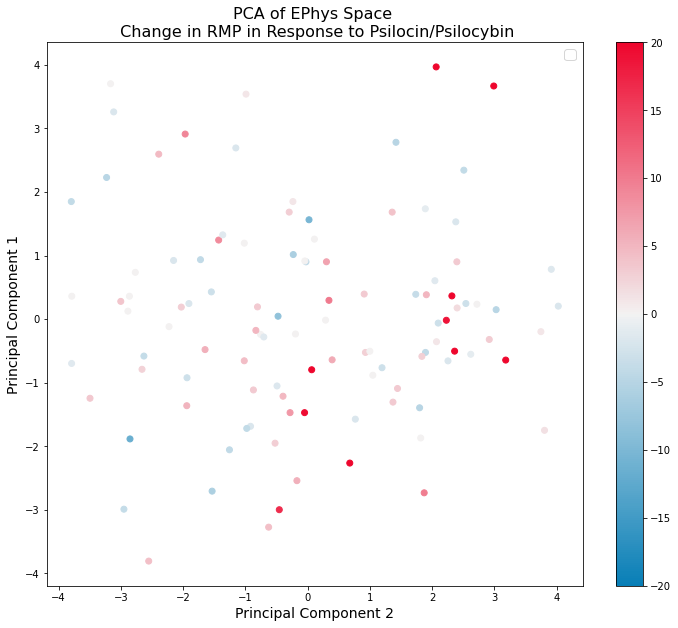

In [64]:
#initiate PCA and fit training data 
pca = PCA(n_components=2)
pca.fit(scaled_inputs)  

#transform trainind data to 2 dimensions
X = pca.transform(scaled_inputs)

#for the plot
plt.figure(figsize=(12,10))
mask1= mouse_train_labels.values.ravel() == 'depolarized'
mask2= mouse_train_labels.values.ravel() == 'hyperpolarized'
mask3= mouse_train_labels.values.ravel() == 'No change'


# plt.scatter(X[mask1, 0], X[mask1, 1],c="green", label = "Depolarized")
# plt.scatter(X[mask2, 0], X[mask2, 1], c="red" , label = "Hyperpolarized")
# plt.scatter(X[mask3, 0], X[mask3, 1], c="purple" , label = "No change")
plt.scatter(X[:, 0], X[:, 1], c=filtered['washin_change'], cmap=pal, vmin=-20, vmax=20)

plt.colorbar()
plt.legend(fontsize= 14)
plt.ylabel("Principal Component 1", fontsize=14)
plt.xlabel("Principal Component 2", fontsize=14)
plt.title("PCA of EPhys Space \n Change in RMP in Response to Psilocin/Psilocybin", fontsize=16)

## UMAP

In [65]:
#use to search for optimal hyperparameters
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', data=data):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=filtered['washin_change'])
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=filtered['washin_change'])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100, c=filtered['washin_change'])
    plt.title(title, fontsize=18)

/home/maciej/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


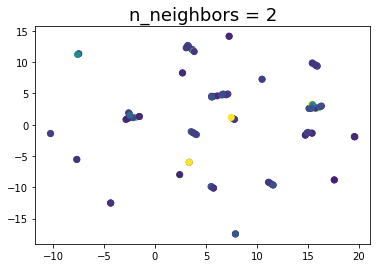

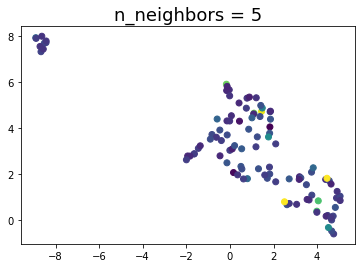

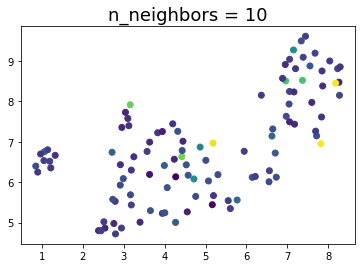

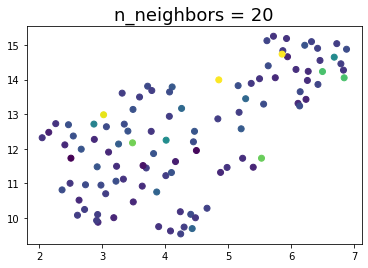

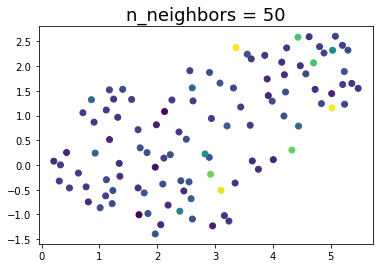

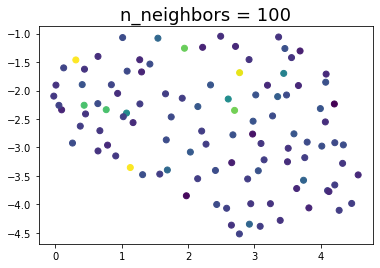

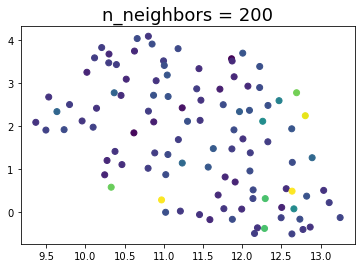

In [66]:
#various plots using different hyperparameters to find the best looking one
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n), data=scaled_inputs)

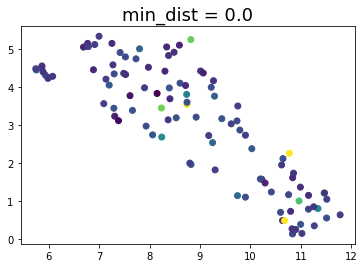

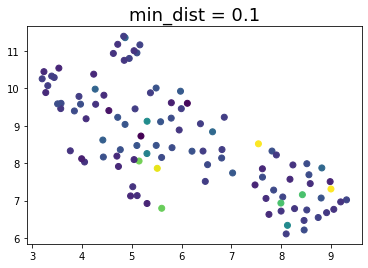

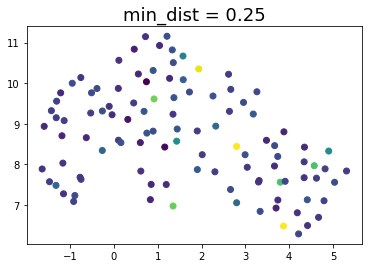

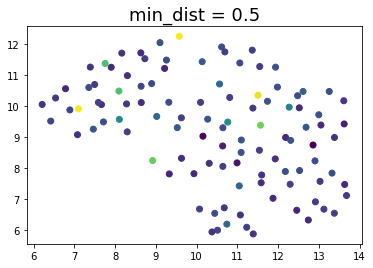

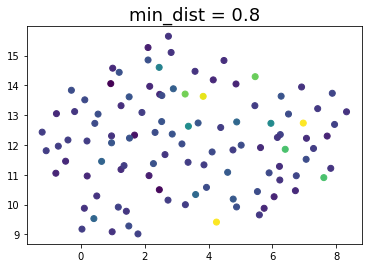

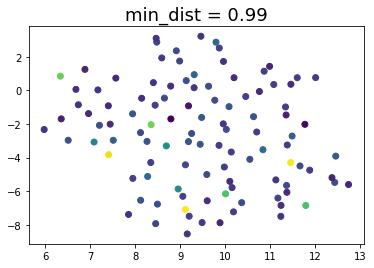

In [67]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d),data=scaled_inputs)

In [68]:
#initiate umapper and fit transform data
umapper = umap.UMAP(random_state=5, n_neighbors=75, min_dist=0.1)
z = umapper.fit_transform(scaled_inputs)

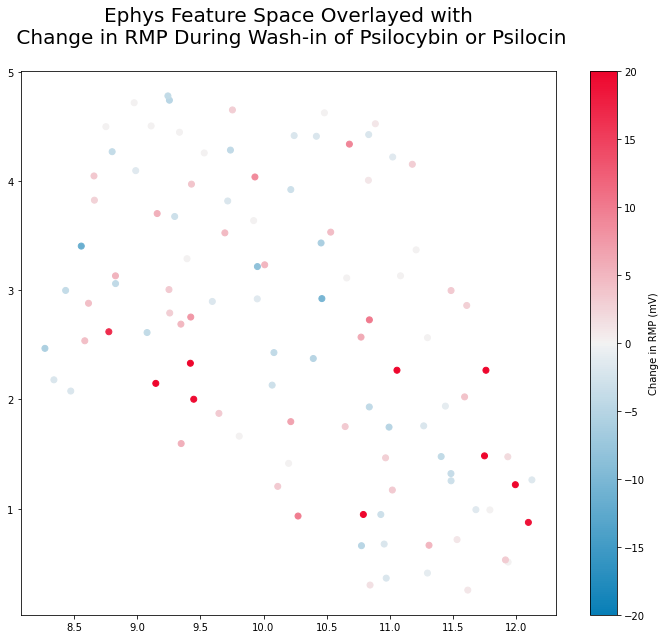

In [69]:
plt.figure(figsize = (12,10))

#plt.plot(z[~culture_mask, 0], z[~culture_mask, 1], '.', c="gray", label= "acute reference")
# plt.scatter(z[mask1, 0], z[mask1, 1],c="green", label = "Depolarized")
# plt.scatter(z[mask2, 0], z[mask2, 1], c="red" , label = "Hyperpolarized")
# plt.scatter(z[mask3, 0], z[mask3, 1], c="purple" , label = "No change")
#plt.scatter(z[:, 0], z[:, 1], c=filtered['washin_change'], cmap="magma_r")
plt.scatter(z[:, 0], z[:, 1], c=filtered['washin_change'], cmap=pal, vmin=-20, vmax=20)


plt.title("Ephys Feature Space Overlayed with\n Change in RMP During Wash-in of Psilocybin or Psilocin\n", fontsize=20)
#plt.legend(fontsize = 13, loc ='lower left')
plt.colorbar(label='Change in RMP (mV)')

# Genetic data
used to access specific gene expression levels from patch-seq experiments

In [70]:
all_genes = pd.read_csv("all_mouse_genes_220701.csv")
all_genes

/home/maciej/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,batch_id,batch_label,batch_color,cell_name_id,cell_name_label,cell_name_color,spec_id_id,spec_id_label,spec_id_color,mouse_id,...,Tenm3,Thsd7a,Tmem215,Tox,Vip,Whrn,Zeb1,Zfhx4,plot_order,xpos
0,167,RSC-201,#F05E5E,14475,Tlx3-Cre_PL56;Ai140;Pvalb-T2A-FlpO;Ai65F-44814...,#FEBA80,14039,832462100,#FEAE77,1335,...,2.061453,0.528810,0.0,0.000000,1.246847,0.000000,1.727067,0.910491,1,1
1,235,RSC-286,#FDDDA0,3824,Htr3a-Cre_NO152;Ai14-572778.04.02.04,#461078,2771,1095192192,#2C115E,2338,...,2.604242,0.000000,0.0,0.000000,0.000000,0.000000,2.350814,0.000000,1,2
2,235,RSC-286,#FDDDA0,3003,Gad2-IRES-Cre;Ai14-574195.05.09.01,#321166,2898,1098604229,#2E1162,2362,...,1.509689,0.000000,0.0,1.389204,0.000000,0.000000,1.681280,0.000000,1,3
3,242,RSC-293,#FDEBAC,14444,Tlx3-Cre_PL56-593007.06.01.01,#FEB97F,4192,1125549831,#4F127B,2610,...,2.109342,0.000000,0.0,0.000000,0.000000,0.785699,2.312194,0.000000,1,4
4,248,RSC-303,#FCF6B8,15772,Vip-IRES-Cre;Ai14-614428.04.02.02,#FDDEA0,5414,1158195029,#6C1D81,2826,...,2.170806,0.589502,0.0,2.116839,2.474591,0.000000,2.020758,0.000000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16900,209,RSC-255,#FEAD76,7897,Pvalb-IRES-Cre;Th-P2A-FlpO;Ai65-514200.06.09.01,#A8327D,583,1011043110,#040414,1875,...,2.456802,1.871615,0.0,0.426242,0.000000,0.000000,0.000000,0.426242,175,16901
16901,245,RSC-296,#FCF0B2,3124,Gad2-IRES-Cre;Ai14-600204.10.02.01,#341069,4793,1138327453,#5E177F,2709,...,3.052595,1.310563,0.0,2.541265,0.000000,2.229204,1.235609,2.176292,175,16902
16902,125,RSC-155,#B3367A,14356,Th-P2A-FlpO;Ai65F-384570.05.02.01,#FEB77D,10008,686260211,#DB476A,732,...,0.438714,1.223101,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,175,16903
16903,240,RSC-291,#FDE7A9,7400,Pvalb-IRES-Cre;Ai14-591938.08.06.01.02,#9C2E7F,4056,1122835739,#4C117A,2600,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,175,16904


## Making a UMAP space from gene expression levels

In [71]:
gene_umap = pd.merge(left = filtered, 
                    right = all_genes, 
                    left_on = 'name', 
                    right_on = 'cell_name_label', 
                    how = 'inner')


gene_umap

,AP_peak,AP_amp,max_dvdt,min_dvdt,halfwidth,resonance_freq,cutoff,input_R,sag,RMP,...,Tenm3,Thsd7a,Tmem215,Tox,Vip,Whrn,Zeb1,Zfhx4,plot_order,xpos
0,61.492920,81.233185,341.18652,-83.007812,0.858643,0.500000,1.064599,155.144440,1.014532,-52.694485,...,0.711019,1.412360,0.000000,2.242810,0.0,2.221745,1.878131,2.125486,150,13165
1,55.114746,87.485199,401.00098,-92.773438,0.801514,0.636364,4.602477,128.840160,0.981435,-62.328617,...,0.000000,0.997447,0.000000,2.970986,0.0,0.738042,0.738042,0.000000,146,11921
2,46.813965,85.692001,357.97119,-73.242188,0.973267,0.500000,2.078331,125.574950,1.000706,-69.629189,...,0.000000,0.000000,0.000000,0.000000,0.0,2.236575,0.000000,0.660025,147,12255
3,42.327881,89.418884,387.57324,-130.310060,0.689819,2.272727,5.496906,66.206032,1.158683,-72.901558,...,0.000000,0.000000,0.000000,2.994081,0.0,2.393340,0.000000,0.000000,146,11922
4,64.025879,82.776787,447.08252,-111.694340,0.651001,0.500000,1.046774,130.228100,0.938279,-54.270794,...,0.708569,0.000000,0.000000,1.530122,0.0,0.000000,0.000000,0.000000,147,12256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,54.992676,88.788628,449.21875,-100.708010,0.739380,0.954545,9.566992,114.776020,0.963938,-68.957764,...,2.676509,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,145,10393
99,55.694580,84.327881,360.10742,-86.059570,0.893188,0.500000,6.899474,106.038320,0.880722,-69.804298,...,0.000000,0.000000,0.000000,0.000000,0.0,1.412198,0.000000,0.000000,146,11923
100,47.332764,90.983109,452.88086,-113.220210,0.690186,0.636364,6.436749,56.835930,0.914994,-87.906342,...,1.348402,0.658091,2.186634,1.762028,0.0,0.000000,0.000000,0.000000,150,13180
101,51.239014,82.233665,328.67432,-86.669922,0.856934,0.500000,4.402227,103.904990,0.925707,-69.218155,...,0.000000,0.556638,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,148,12677


In [73]:
#select important columns

final_gene_umap = gene_umap.loc[:, ['subclass_label','Cdh6', 'Cdkn1a', 'Chat', 'Chodl', 'Cntnap5a','Col25a1','Cpne4','Ctss', 'Cux2', 'Egfem1', 'Endou', 'Fezf2', 'Fxyd6', 'Gad1', 'Gad2', 'Gja1', 'Gpr83', 'Gpr88','Grik1', 'Htr1a', 'Htr1f', 'Htr2a', 'Htr3a', 'Kcnab3','Kcnf1','Lamp5','Mbp', 'Ndnf','Necab1','Ntn5','Pak6','Phactr2','Pid1','Pld5','Plekha7','Ptprf','Pvalb','Rmst','Robo1','Rorb','Rspo1','Scnn1a','Sgcd','Slc17a7','Slc32a1','Sorcs2','Sst','Tenm3','Thsd7a','Tmem215','Tox','Vip','Whrn','Zeb1','Zfhx4','genes_label','washin_change'
]]
#Cdh6,Cdkn1a,Chat,Chodl,Cntnap5a,Col25a1,Cpne4,Ctss,Cux2,Egfem1,Endou,Fezf2,Fxyd6,Gad1,Gad2,Gja1,Gpr83,Gpr88,Grik1,Htr1a,Htr1f,Htr2a,Htr3a,Kcnab3,Kcnf1,Lamp5,Mbp,Ndnf,Necab1,Ntn5,Pak6,Phactr2,Pid1,Pld5,Plekha7,Ptprf,Pvalb,Rmst,Robo1,Rorb,Rspo1,Scnn1a,Sgcd,Slc17a7,Slc32a1,Sorcs2,Sst,Tenm3,Thsd7a,Tmem215,Tox,Vip,Whrn,Zeb1,Zfhx4

final_gene_umap['depolarized'] = np.where(final_gene_umap['washin_change'] > 20, 1, 0)
final_gene_umap['hyperpolarized'] = np.where(final_gene_umap['washin_change'] < 0, 1, 0)
final_gene_umap

,subclass_label,Cdh6,Cdkn1a,Chat,Chodl,Cntnap5a,Col25a1,Cpne4,Ctss,Cux2,...,Tmem215,Tox,Vip,Whrn,Zeb1,Zfhx4,genes_label,washin_change,depolarized,hyperpolarized
0,L6 IT,0.967610,1.800098,0.0,0.0,0.711019,2.591312,2.868079,0.711019,2.700722,...,0.000000,2.242810,0.0,2.221745,1.878131,2.125486,6954,-11.50190,0,1
1,L4,0.000000,0.000000,0.0,0.0,0.738042,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.970986,0.0,0.738042,0.738042,0.000000,3694,38.69460,1,0
2,L6 IT,0.000000,2.827612,0.0,0.0,2.473349,0.000000,2.723890,3.403626,1.184254,...,0.000000,0.000000,0.0,2.236575,0.000000,0.660025,5561,-3.08355,0,1
3,L5 PT,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.393340,0.000000,...,0.000000,2.994081,0.0,2.393340,0.000000,0.000000,1935,37.65800,1,0
4,L6 CT,0.000000,2.148600,0.0,0.0,0.708569,0.000000,1.241720,3.218514,0.000000,...,0.000000,1.530122,0.0,0.000000,0.000000,0.000000,5589,5.55564,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Pvalb,0.000000,0.000000,0.0,0.0,1.413915,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2418,-1.93707,0,1
99,L4,0.000000,3.013523,0.0,0.0,2.712913,0.000000,0.000000,0.000000,2.428086,...,0.000000,0.000000,0.0,1.412198,0.000000,0.000000,2798,4.99753,0,0
100,L2/3 IT,2.097879,2.344690,0.0,0.0,1.917344,0.658091,0.000000,1.762028,0.000000,...,2.186634,1.762028,0.0,0.000000,0.000000,0.000000,6375,-1.61104,0,1
101,L2/3 IT,0.000000,2.510203,0.0,0.0,2.701859,0.000000,0.000000,3.486356,1.146560,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5104,-1.51787,0,1


In [74]:
#define data used to make UMAP
gene_train = final_gene_umap.iloc[:,1:-2]
gene_train_labels = final_gene_umap.iloc[:,-1:]

#scale imputs
scaler2 = StandardScaler()
scaler2.fit(gene_train)
scaled_inputs2 = scaler2.transform(gene_train)

scaled_inputs2

array([[ 0.01727384,  0.59520742, -0.09901475, ...,  2.40878775,
        -0.13477459, -1.29529865],
       [-0.93136159, -1.24469614, -0.09901475, ..., -0.55423549,
        -1.42887274,  3.08814177],
       [-0.93136159,  1.64544263, -0.09901475, ...,  0.36586965,
        -0.68774353, -0.56016102],
       ...,
       [ 1.12537769,  1.15184201, -0.09901475, ..., -0.55423549,
        -0.36461595, -0.43157318],
       [-0.93136159,  1.32101506, -0.09901475, ..., -0.55423549,
        -0.86915544, -0.42343705],
       [-0.93136159, -1.24469614, -0.09901475, ...,  2.53323478,
        -0.38605193,  0.0070896 ]])

In [75]:
#initate umapper and fit transform data
umapper2 = umap.UMAP(random_state=5)
w = umapper2.fit_transform(scaled_inputs2)

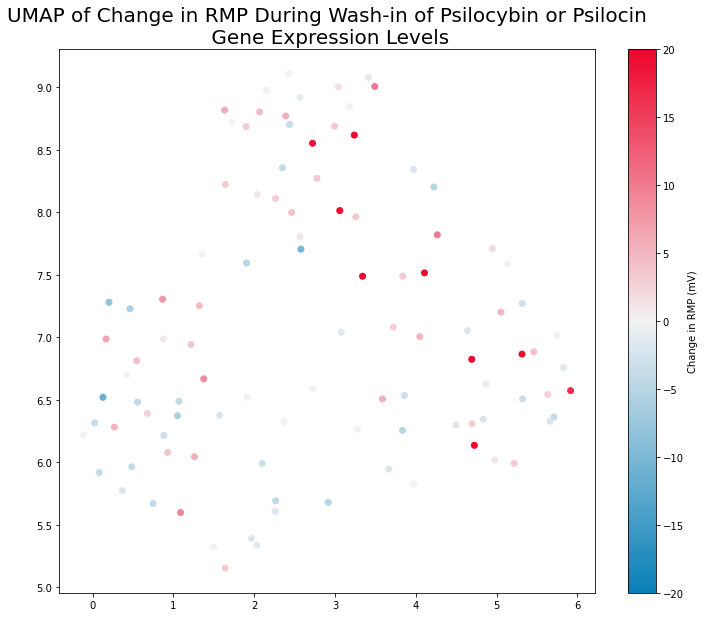

In [76]:
plt.figure(figsize = (12,10))
plt.scatter(w[:, 0], w[:, 1], c=final_gene_umap['washin_change'], cmap=pal, vmin=-20, vmax=20)


plt.title("UMAP of Change in RMP During Wash-in of Psilocybin or Psilocin\n Gene Expression Levels", fontsize=20)
#plt.legend(fontsize = 13, loc ='lower left')
plt.colorbar(label='Change in RMP (mV)')

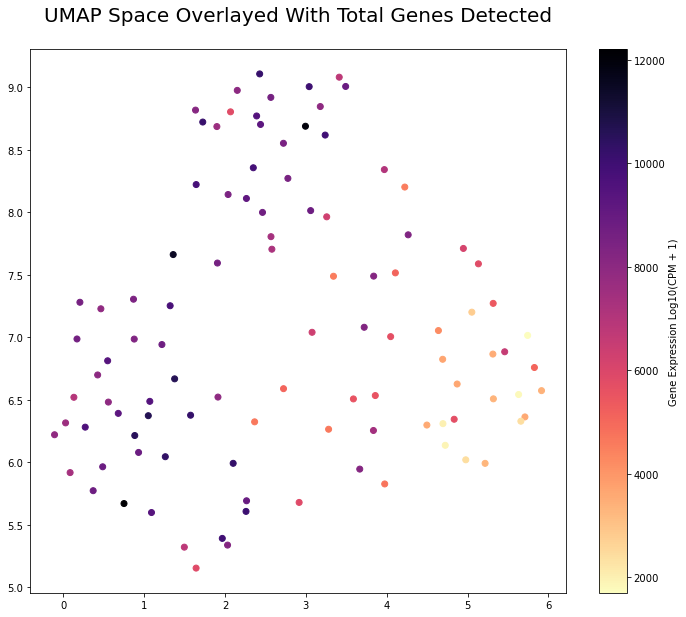

In [77]:
plt.figure(figsize = (12,10))
plt.scatter(w[:, 0], w[:, 1], c=final_gene_umap['genes_label'], cmap="magma_r")


plt.title("UMAP Space Overlayed With Total Genes Detected\n", fontsize=20)
#plt.legend(fontsize = 13, loc ='lower left')
plt.colorbar(label='Gene Expression Log10(CPM + 1)')

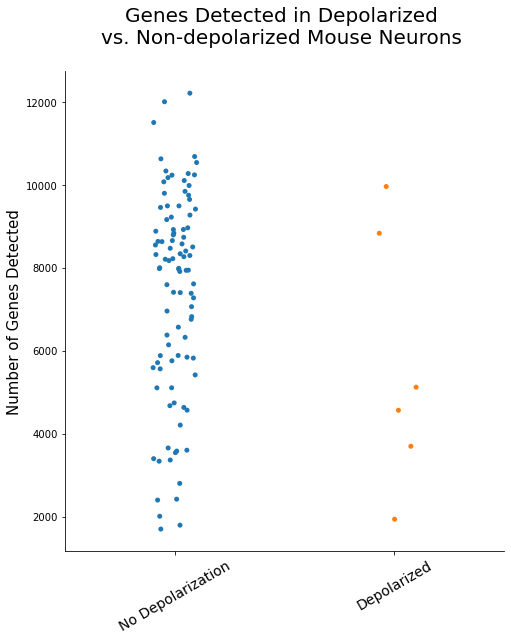

In [78]:
#check to see if neurons that depolarize have different number of genes detected than those that do not
#hypothesis is that depolarizing neurons will have less genes detected because it is harder to get the nucleus out

sns.catplot(x="depolarized", y="genes_label",data=final_gene_umap, height=9, aspect=.8)
plt.ylabel('Number of Genes Detected',fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.xticks( [0,1], labels=["No Depolarization", "Depolarized"], fontsize=14, rotation=30)
plt.title('Genes Detected in Depolarized \nvs. Non-depolarized Mouse Neurons \n', fontsize = 20)
plt.tight_layout()

In [79]:
means = final_gene_umap.groupby('depolarized').mean()
means = means.T
means2=means[:-3]
means2.reset_index(inplace=True)
means2.columns = ["gene name", "Non-Depolarizing Cells", "Depolarizing Cells"]
means2.to_csv("dep_DGE.csv")

In [80]:
hyp_means = final_gene_umap.groupby('hyperpolarized').mean()
hyp_means = hyp_means.T
hyp_means2=hyp_means[:-3]
hyp_means2.reset_index(inplace=True)
hyp_means2.columns = ["gene name", "Non-Hyperpolarizing Cells", "Hyperpolarizing Cells"]
#means2.to_csv("dep_DGE.csv")

In [81]:
hyp_means2

,gene name,Non-Hyperpolarizing Cells,Hyperpolarizing Cells
0,Cdh6,0.843259,1.118094
1,Cdkn1a,1.179469,1.278088
2,Chat,0.000000,0.038631
3,Chodl,0.000000,0.000000
4,Cntnap5a,1.856177,1.683538
5,Col25a1,0.834001,0.732714
6,Cpne4,1.590298,1.327055
7,Ctss,1.345113,1.477710
8,Cux2,1.173459,1.143491
9,Egfem1,1.853703,1.450876


In [82]:
color_dict={'Cdh6':'orange' , 'Cdkn1a':'orange', 'Chat':'orange', 'Chodl':'orange', 'Cntnap5a':'orange', 'Col25a1':'orange', 'Cpne4':'orange',
       'Ctss':'orange', 'Cux2':'orange', 'Egfem1':'orange', 'Endou':'orange', 'Fezf2':'orange', 'Fxyd6':'orange', 'Gad1':'orange', 'Gad2':'orange',
       'Gja1':'orange', 'Gpr83':'orange', 'Gpr88':'orange', 'Grik1':'orange', 'Htr1a':'blue', 'Htr1f':'blue', 'Htr2a':'red', 'Htr3a':'blue',
       'Kcnab3':'orange', 'Kcnf1':'orange', 'Lamp5':'orange', 'Mbp':'black', 'Ndnf':'orange', 'Necab1':'orange', 'Ntn5':'orange', 'Pak6':'orange',
       'Phactr2':'orange', 'Pid1':'orange', 'Pld5':'orange', 'Plekha7':'orange', 'Ptprf':'orange', 'Pvalb':'orange', 'Rmst':'orange', 'Robo1':'orange',
       'Rorb':'orange', 'Rspo1':'orange', 'Scnn1a':'orange', 'Sgcd':'orange', 'Slc17a7':'orange', 'Slc32a1':'orange', 'Sorcs2':'orange',
       'Sst':'orange', 'Tenm3':'orange', 'Thsd7a':'orange', 'Tmem215':'orange', 'Tox':'orange', 'Vip':'orange', 'Whrn':'black', 'Zeb1':'orange',
       'Zfhx4':'orange'}

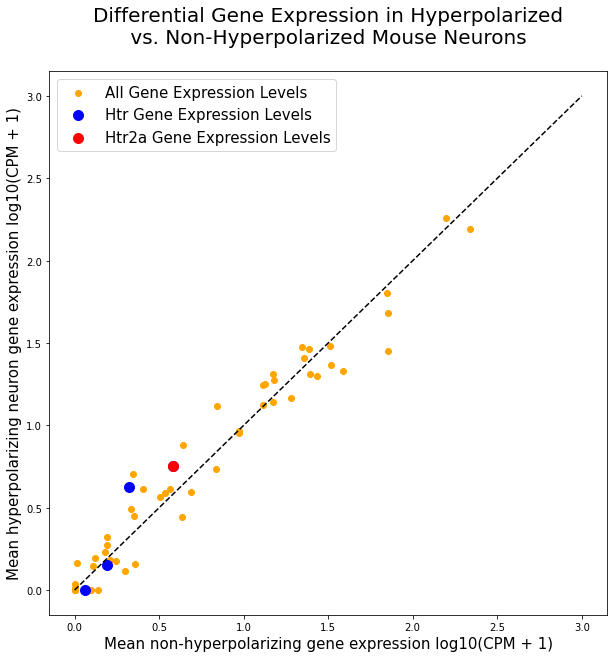

In [83]:
o = [0,3]
i = o

plt.figure(figsize = (10,10))
plt.scatter(hyp_means2["Non-Hyperpolarizing Cells"],hyp_means2["Hyperpolarizing Cells"], label= 'All Gene Expression Levels', c="orange")
plt.scatter(hyp_means2[hyp_means2["gene name"].str.contains('Htr')]["Non-Hyperpolarizing Cells"],hyp_means2[hyp_means2["gene name"].str.contains('Htr')]["Hyperpolarizing Cells"], label= 'Htr Gene Expression Levels', c='blue', s=100)
plt.scatter(hyp_means2[hyp_means2["gene name"]=="Htr2a"]["Non-Hyperpolarizing Cells"],hyp_means2[hyp_means2["gene name"]=="Htr2a"]["Hyperpolarizing Cells"], label= 'Htr2a Gene Expression Levels', c='red', s=100)
#plt.scatter(stress_means['hIVSCC-MET'],stress_means['hIVSCC-METc'], label= 'stress response genes', c='cornflowerblue')
#plt.ylim(0,3)
#plt.xlim(0,3)
plt.legend(fontsize = 15)
plt.ylabel('Mean hyperpolarizing neuron gene expression log10(CPM + 1)',fontsize = 15)
plt.xlabel('Mean non-hyperpolarizing gene expression log10(CPM + 1)',fontsize = 15)
plt.title('Differential Gene Expression in Hyperpolarized\n vs. Non-Hyperpolarized Mouse Neurons \n', fontsize = 20)
plt.plot(o,i, c='black', linestyle='--')

## check the t-types of the mouse neurons that depolarize in response to psilocin